Notebook contains resources that creates:
- Activation blocks
- Layers
- Loss functions
- Backpropagation



In [1]:
import pandas as pd
import numpy as np
mnist_train=pd.read_csv("data/mnist_train.csv")
mnist_test=pd.read_csv("data/mnist_test.csv")

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist_train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
### Create a logic for a single neuron ###
def neuron(input_dim):
    w=np.random.randn(input_dim,)
    return w
def add_layer(input_dim,n_neurons):
    w=np.array([neuron(input_dim) for i in range(n_neurons)]).T/np.sqrt(input_dim)
    b=np.random.randn(n_neurons)
    params={'w':w,'b':b}
    return params

In [5]:
add_layer(784,3)

{'w': array([[-0.03943118,  0.04573324, -0.00488661],
        [-0.04126092,  0.01235138,  0.02565784],
        [ 0.01180726, -0.01258077, -0.02473452],
        ...,
        [ 0.0377321 , -0.02877134,  0.01824751],
        [ 0.05450325,  0.00685056, -0.02692045],
        [ 0.01182857,  0.02577189, -0.00464664]]),
 'b': array([0.60954334, 0.51397785, 0.69031898])}

In [6]:
##### Create a NN class in which layers can be added ######
class MLP():
    def __init__(self,input_dim):
        self.input_dim=input_dim
        self.layers=[]
    def _neuron(self,input_dim):
        w=np.random.randn(input_dim,)
        return w
    def _add_layer(self,input_dim,n):
        w=np.array([self._neuron(input_dim) for i in range(n)]).T
        b=np.random.randn(n)
        params={'w':w,'b':b}
        return params
    def add_layer(self,n):
        if len(self.layers)==0:
            self.layers.append(self._add_layer(self.input_dim,n))
        else:
            self.layers.append(self._add_layer(self.layers[-1]['w'].shape[1],n))
    def summary(self):
        result={}
        for i,layer in enumerate(self.layers):
            result[f'layer_{i+1}_dim']=layer['w'].shape
        print(result)

In [7]:
model=MLP(784)

In [8]:
model.add_layer(n=3)

In [9]:
model.summary()

{'layer_1_dim': (784, 3)}


In [10]:
model.add_layer(n=10)

In [11]:
model.summary()

{'layer_1_dim': (784, 3), 'layer_2_dim': (3, 10)}


In [12]:
###### We can now extend the class to include activation functions #####
class MLP():
    def __init__(self,input_dim):
        self.input_dim=input_dim
        self.layers=[]
        self.activations=[]
    def _neuron(self,input_dim):
        w=np.random.randn(input_dim,)
        return w
    def _add_layer(self,input_dim,n,activation):
        w=np.array([self._neuron(input_dim) for i in range(n)]).T
        b=np.random.randn(n)
        if activation not in ["sigmoid",'softmax']:
            raise Exception("Activation can only be one of sigmoid or softmax")
        params={'w':w,'b':b,'activation':activation}
        return params
    def add_layer(self,n,activation):
        if len(self.layers)==0:
            self.layers.append(self._add_layer(self.input_dim,n,activation))
        else:
            self.layers.append(self._add_layer(self.layers[-1]['w'].shape[1],n,activation))
    def __repr__(self):
        mesg=""
        for i,layer in enumerate(self.layers):
            mesg+=f"Layer_{i}_dim_{layer['w'].shape}_activation_{layer['activation']}\n"
        return mesg
    def sigmoid(self,z):
        activation=1/(1+np.exp(-z))
        return activation
    def softmax(self,z):
        activation=np.exp(z)/np.exp(z).sum(axis=1,keepdims=True)
        return activation

In [13]:
model=MLP(784)

In [14]:
model.add_layer(n=30,activation='sigmoid')

In [15]:
model.add_layer(n=10,activation='softmax')

In [16]:
print(model)

Layer_0_dim_(784, 30)_activation_sigmoid
Layer_1_dim_(30, 10)_activation_softmax



In [17]:
### Add a forward method to compute forward pass ###
class MLP():
    def __init__(self,input_dim):
        self.input_dim=input_dim
        self.layers=[]
        self.activations=[]
        self.z=[]
    def _neuron(self,input_dim):
        w=np.random.randn(input_dim,)
        return w
    def _add_layer(self,input_dim,n,activation):
        w=np.array([self._neuron(input_dim) for i in range(n)]).T
        b=np.random.randn(n)
        if activation not in ["sigmoid",'softmax']:
            raise Exception("Activation can only be one of sigmoid or softmax")
        params={'w':w,'b':b,'activation':activation}
        return params
    def add_layer(self,n,activation):
        if len(self.layers)==0:
            self.layers.append(self._add_layer(self.input_dim,n,activation))
        else:
            self.layers.append(self._add_layer(self.layers[-1]['w'].shape[1],n,activation))
    def __repr__(self):
        mesg=""
        for i,layer in enumerate(self.layers):
            mesg+=f"Layer_{i}_dim_{layer['w'].shape}_activation_{layer['activation']}\n"
        return mesg
    def sigmoid(self,z):
        activation=1/(1+np.exp(-z))
        return activation
    def softmax(self,z): #http://cs231n.github.io/linear-classify (Numerical Stability)
        e_z=np.exp(z-np.max(z))
        activation=e_z/e_z.sum(axis=1,keepdims=True)
        return activation
    def forward(self,batch):
        acts={'sigmoid':self.sigmoid,'softmax':self.softmax}
        self.activations=[]
        self.z=[]
        for layer in self.layers:
            batch=np.matmul(batch,layer['w'])+layer['b']
            self.z.append(batch)
            batch=acts[layer['activation']](batch)
            self.activations.append(batch)
        return batch           

In [18]:
b=mnist_train.drop('label',axis=1).iloc[0:2].values

In [19]:
b.shape

(2, 784)

In [20]:
mod=MLP(input_dim=784)

In [21]:
mod.add_layer(n=3,activation='sigmoid')
mod.add_layer(n=10,activation='softmax')

In [22]:
mod.forward(b)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


array([[0.34827918, 0.0150112 , 0.50751865, 0.00322607, 0.00532973,
        0.02428844, 0.0135786 , 0.04383151, 0.00563125, 0.03330536],
       [0.53665339, 0.12375228, 0.02184806, 0.01621716, 0.01755996,
        0.00917879, 0.01982069, 0.23813518, 0.01420912, 0.00262535]])

In [23]:
mod.activations

[array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [7.16031017e-28, 1.00000000e+00, 1.00000000e+00]]),
 array([[0.34827918, 0.0150112 , 0.50751865, 0.00322607, 0.00532973,
         0.02428844, 0.0135786 , 0.04383151, 0.00563125, 0.03330536],
        [0.53665339, 0.12375228, 0.02184806, 0.01621716, 0.01755996,
         0.00917879, 0.01982069, 0.23813518, 0.01420912, 0.00262535]])]

In [24]:
mod.z

[array([[  276.77554829, -1014.08553463,   840.17385997],
        [  -62.5038293 ,  6229.27681067,   930.62318329]]),
 array([[ 3.07840307, -0.06580486,  3.45493211, -1.60333741, -1.10129991,
          0.41539937, -0.16610604,  1.00575154, -1.04626974,  0.73111709],
        [ 2.72707836,  1.26000777, -0.47416175, -0.77220431, -0.6926525 ,
         -1.34137818, -0.57154774,  1.91456441, -0.90438985, -2.59305961]])]

In [25]:
##### Include a cost computation mechanism #####
def ce_loss(softmax,y):
    loss=-np.log(softmax[range(y.shape[0]),y])
    loss=np.sum(loss)/y.shape[0]
    return loss

In [26]:
ce_loss(mod.forward(b),np.array([0,1]))

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


1.572112148560461

Backprop Equations: http://neuralnetworksanddeeplearning.com/chap2.html

Implimentation: http://cs231n.github.io/neural-networks-case-study/

We first need to compute the gradient for the outer most layer:
- Compute $\delta$ for the last layer, using BP eq 1, when activation is softmax and loss function is cross entropy loss, the $\delta=p-y$
- $dw$ for last layer = $a^{T}_{l-1}\delta$
- $db$ for the last layer=$\delta_{avg}$
- For the layers other than the last layer, compute $\delta$ differently
- $\delta_i=\delta_{i+1} W_{i+1}^T\odot \frac{d(actFun(z_{i})}{d(z_{i})}$
- For sigmoid activation the gradient will be $\sigma(z_i)\odot(1-\sigma(z_i))$

In [27]:
#### Include backward pass ####
class MLP():
    def __init__(self,input_dim):
        self.input_dim=input_dim
        self.layers=[]
        self.activations=[]
        self.z=[]
    def _neuron(self,input_dim):
        w=np.random.randn(input_dim,)
        return w
    def _add_layer(self,input_dim,n,activation):
        w=np.array([self._neuron(input_dim) for i in range(n)]).T
        b=np.random.randn(n)
        if activation not in ["sigmoid",'softmax']:
            raise Exception("Activation can only be one of sigmoid or softmax")
        params={'w':w,'b':b,'activation':activation}
        return params
    def add_layer(self,n,activation):
        if len(self.layers)==0:
            self.layers.append(self._add_layer(self.input_dim,n,activation))
        else:
            self.layers.append(self._add_layer(self.layers[-1]['w'].shape[1],n,activation))
    def __repr__(self):
        mesg=""
        for i,layer in enumerate(self.layers):
            mesg+=f"Layer_{i}_dim_{layer['w'].shape}_activation_{layer['activation']}\n"
        return mesg
    def sigmoid(self,z):
        activation=1/(1+np.exp(-z))
        return activation
    def softmax(self,z): #http://cs231n.github.io/linear-classify (Numerical Stability)
        e_z=np.exp(z-np.max(z))
        activation=e_z/e_z.sum(axis=1,keepdims=True)
        return activation
    def forward(self,batch):
        acts={'sigmoid':self.sigmoid,'softmax':self.softmax}
        self.activations=[]
        self.z=[]
        for layer in self.layers:
            batch=np.matmul(batch,layer['w'])+layer['b']
            self.z.append(batch)
            batch=acts[layer['activation']](batch)
            self.activations.append(batch)
        return batch                
    def sigmoid_prime(self,z):
        sig1=self.sigmoid(z)
        sig2=1-sig1
        return np.multiply(sig1,sig2)
    def _backward(self,y,batch):
        num_class=self.activations[-1].shape[1]
        batch_size=y.shape[0]
        y_hat=np.zeros((batch_size,num_class))
        y_hat[range(batch_size),y]=1
        delta=self.activations[-1]-y_hat
        delta=delta/batch_size
        DB=[0]*len(self.layers)
        DW=[0]*len(self.layers)
        DELTA=[0]*len(self.layers)
        DB[-1]=delta.sum(axis=0,keepdims=True) ## last layer, gradients
        DW[-1]=np.matmul(self.activations[-2].T,delta)
        DELTA[-1]=delta
        for i in range(len(self.layers)-2,-1,-1):
            delta_prev=DELTA[i+1]
            wt_prev=self.layers[i+1]['w'] ##Lifo stack
            act_prev=self.activations[i-1] ##Lifo stack
            z=self.z[i]
            delta=np.multiply(np.matmul(delta_prev,wt_prev.T),self.sigmoid_prime(z))
            DELTA[i]=delta
            DB[i]=delta.sum(axis=0,keepdims=True)
            if i!=0:
                DW[i]=np.matmul(act_prev.T,delta)
            else:
                DW[i]=np.matmul(batch.T,delta)
        return DW,DB
    def backward(self,y,batch):
        DW,DB=self._backward(y,batch)
        self.dw=DW
        self.db=DB

In [28]:
X=mnist_train.drop('label',axis=1).iloc[0:2].values
y=mnist_train['label'].iloc[0:2].values

In [29]:
model=MLP(784)

In [30]:
model.add_layer(n=3,activation='sigmoid')

In [31]:
model.add_layer(n=10,activation="softmax")

In [32]:
model.forward(batch=b)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


array([[0.11019506, 0.01204255, 0.00860702, 0.07064715, 0.02399152,
        0.02490313, 0.34647734, 0.03075771, 0.08715637, 0.28522215],
       [0.29269136, 0.02700387, 0.05770593, 0.06149104, 0.03961503,
        0.03517368, 0.05002977, 0.02791154, 0.0316819 , 0.3766959 ]])

In [33]:
model.activations[-1].shape

(2, 10)

In [34]:
model.z

[array([[ 2.18359651e+00, -4.23519328e+02,  2.15189265e+03],
        [-4.74130653e+03, -1.95903847e+03,  4.25662413e+03]]),
 array([[ 0.48918794, -1.72461765, -2.06048607,  0.04463353, -1.03536354,
         -0.99807084,  1.63475324, -0.78692343,  0.25463972,  1.44020418],
        [ 1.49534355, -0.88779489, -0.12841523, -0.06488372, -0.50456649,
         -0.62347702, -0.27115699, -0.85473508, -0.72802971,  1.74766309]])]

In [35]:
model.backward(y,X)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


In [36]:
model.db

[array([[6.80949701e-002, 6.28779362e-185, 0.00000000e+000]]),
 array([[-0.29855679, -0.48047679,  0.03315647,  0.06606909,  0.03180328,
          0.0300384 ,  0.19825355,  0.02933462,  0.05941913,  0.33095902]])]

In [37]:
model.dw[0].shape

(784, 3)

In [38]:
##### Now add the gradient descent method that will modify the network weights ########
class MLP():
    def __init__(self,input_dim):
        self.input_dim=input_dim
        self.layers=[]
        self.activations=[]
        self.z=[]
    def _neuron(self,input_dim):
        w=np.random.randn(input_dim,)
        return w
    def _add_layer(self,input_dim,n,activation):
        w=np.array([self._neuron(input_dim) for i in range(n)]).T
        b=np.random.randn(n)
        if activation not in ["sigmoid",'softmax']:
            raise Exception("Activation can only be one of sigmoid or softmax")
        params={'w':w,'b':b,'activation':activation}
        return params
    def add_layer(self,n,activation):
        if len(self.layers)==0:
            self.layers.append(self._add_layer(self.input_dim,n,activation))
        else:
            self.layers.append(self._add_layer(self.layers[-1]['w'].shape[1],n,activation))
    def __repr__(self):
        mesg=""
        for i,layer in enumerate(self.layers):
            mesg+=f"Layer_{i}_dim_{layer['w'].shape}_activation_{layer['activation']}\n"
        return mesg
    def sigmoid(self,z):
        activation=1/(1+np.exp(-z))
        return activation
    def softmax(self,z): #http://cs231n.github.io/linear-classify (Numerical Stability)
        e_z=np.exp(z-np.max(z))
        activation=e_z/e_z.sum(axis=1,keepdims=True)
        return activation
    def forward(self,batch):
        acts={'sigmoid':self.sigmoid,'softmax':self.softmax}
        self.activations=[]
        self.z=[]
        for layer in self.layers:
            batch=np.matmul(batch,layer['w'])
            batch=batch+layer['b']
            self.z.append(batch)
            batch=acts[layer['activation']](batch)
            self.activations.append(batch)
        return batch                
    def sigmoid_prime(self,z):
        sig1=self.sigmoid(z)
        sig2=1-sig1
        return np.multiply(sig1,sig2)
    def _backward(self,y,batch):
        num_class=self.activations[-1].shape[1]
        batch_size=y.shape[0]
        y_hat=np.zeros((batch_size,num_class))
        y_hat[range(batch_size),y]=1
        delta=self.activations[-1]-y_hat
        delta=delta/batch_size
        DB=[0]*len(self.layers)
        DW=[0]*len(self.layers)
        DELTA=[0]*len(self.layers)
        DB[-1]=delta.sum(axis=0,keepdims=True) ## last layer, gradients
        DW[-1]=np.matmul(self.activations[-2].T,delta)
        DELTA[-1]=delta
        for i in range(len(self.layers)-2,-1,-1):
            delta_prev=DELTA[i+1]
            wt_prev=self.layers[i+1]['w']
            act_prev=self.activations[i-1]
            z=self.z[i]
            delta=np.multiply(np.matmul(delta_prev,wt_prev.T),self.sigmoid_prime(z))
            DELTA[i]=delta
            DB[i]=delta.sum(axis=0,keepdims=True)
            if i!=0:
                DW[i]=np.matmul(act_prev.T,delta)
            else:
                DW[i]=np.matmul(batch.T,delta)
        self.DELTA=DELTA        
        return DW,DB
    def backward(self,y,batch):
        DW,DB=self._backward(y,batch)
        self.dw=DW
        self.db=DB
    def update_weights(self,lr):
        for i in range(len(self.layers)):
            dw=self.dw[i]
            self.layers[i]['w']=self.layers[i]['w']-(lr)*dw
            db=self.db[i]
            self.layers[i]['b']=self.layers[i]['b']-(lr)*np.squeeze(db,axis=0)                        

In [39]:
model=MLP(784)
model.add_layer(n=3,activation='sigmoid')
model.add_layer(n=13,activation='sigmoid')
model.add_layer(n=10,activation="softmax")

In [40]:
model.forward(X)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


array([[4.99691189e-01, 2.79986522e-04, 1.62155096e-02, 1.03581723e-03,
        1.10798645e-01, 8.22051273e-05, 4.61884995e-03, 5.29180343e-03,
        1.15383933e-03, 3.60832155e-01],
       [1.98613081e-01, 8.36498999e-05, 8.44377288e-02, 3.23082365e-04,
        4.87563070e-02, 7.20924868e-05, 3.79383681e-03, 4.06075912e-02,
        4.51691356e-04, 6.22860939e-01]])

In [41]:
model.backward(y,X)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


In [42]:
model.update_weights(lr=0.001)

In [43]:
model.forward(X)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


array([[5.00262087e-01, 2.80973789e-04, 1.62221875e-02, 1.03672502e-03,
        1.10847607e-01, 8.22768878e-05, 4.62243189e-03, 5.29406453e-03,
        1.15487320e-03, 3.60196774e-01],
       [1.99038376e-01, 8.39641897e-05, 8.45347672e-02, 3.23561295e-04,
        4.88096952e-02, 7.22058365e-05, 3.79964261e-03, 4.06546239e-02,
        4.52384144e-04, 6.22230779e-01]])

In [45]:
model=MLP(784)
model.add_layer(30,"sigmoid")
model.add_layer(30,"sigmoid")
model.add_layer(10,"softmax")
X=mnist_train.drop('label',axis=1).values
X=X/255.0
y=mnist_train['label'].values
Losses=[]
for i in range(20):
    preds=model.forward(X)
    accuracy=(preds.argmax(axis=1)==y).mean()
    loss=ce_loss(preds,y)
    Losses.append(loss)
    print(f"Iteration {i}, loss{loss}, accuracy {accuracy}")
    model.backward(y,X)
    model.update_weights(lr=0.1)

Iteration 0, loss4.51132227997787, accuracy 0.1154047619047619
Iteration 1, loss3.9222778953178743, accuracy 0.11466666666666667
Iteration 2, loss3.5863394259900616, accuracy 0.11414285714285714
Iteration 3, loss3.3691787435014864, accuracy 0.11538095238095238
Iteration 4, loss3.2106490811947066, accuracy 0.11823809523809524
Iteration 5, loss3.0864948449095366, accuracy 0.12326190476190477
Iteration 6, loss2.985253160254764, accuracy 0.12680952380952382
Iteration 7, loss2.900481883951774, accuracy 0.13073809523809524
Iteration 8, loss2.8281702399120925, accuracy 0.1345952380952381
Iteration 9, loss2.7657005681311007, accuracy 0.13685714285714284
Iteration 10, loss2.7113151263335333, accuracy 0.1398095238095238
Iteration 11, loss2.6637897264955854, accuracy 0.14276190476190476
Iteration 12, loss2.6222205875407867, accuracy 0.1457142857142857
Iteration 13, loss2.5858867587881615, accuracy 0.14854761904761904
Iteration 14, loss2.554166743236862, accuracy 0.15078571428571427
Iteration 15, 

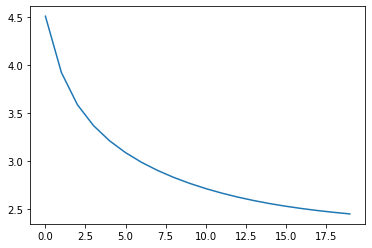

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(20),Losses)

In [47]:
############### Add mini batching ############### 
X=np.array([[1,2,3],
[4,5,6],
[7,8,9],
[10,11,12],
[13,14,15],
[16,17,18],
[19,20,21],
[22,23,24],
[25,26,27],
[28,29,30]])

### batch of 2 ###
size=10
batch_size=3
steps=10//batch_size
for i in range(steps):
    if i==0:
        start=0
        next_item=start+batch_size
        print(X[start:next_item,])	
    if i<(steps-2):
        start+=batch_size
        next_item+=batch_size
        print(X[start:next_item,])
    if i==steps-1:
        start+=batch_size
        print(X[start:,])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[10 11 12]
 [13 14 15]
 [16 17 18]]
[[19 20 21]
 [22 23 24]
 [25 26 27]
 [28 29 30]]


In [48]:
####### Model init ########
model=MLP(784)
model.add_layer(30,"sigmoid")
model.add_layer(10,"softmax")
X=mnist_train.drop('label',axis=1).values
y=mnist_train['label'].values
X=X/255.0
Losses=[]
##### Training loop ##########
batch_size=100
size=X.shape[0]
steps=size//batch_size
num_epoch=30
def run(model,X,y,start,next_value,lr=0.1):
    x=X[start:next_item,]
    Y=y[start:next_item]
    preds=model.forward(x)
    accuracy=(preds.argmax(axis=1)==Y).mean()
    loss=round(ce_loss(preds,Y),2)
    Losses.append(loss)
    print(f"Epoch {i}, Iteration {j}, loss{loss}, accuracy {accuracy}")
    model.backward(Y,x)
    model.update_weights(lr)    
for i in range(num_epoch):
    for j in range(steps):
        if j==0:
            start=0
            next_item=start+batch_size
            run(model,X,y,start,next_item)
        else :
            start+=batch_size
            next_item+=batch_size
            run(model,X,y,start,next_item)

Epoch 0, Iteration 0, loss6.15, accuracy 0.13
Epoch 0, Iteration 1, loss5.8, accuracy 0.09
Epoch 0, Iteration 2, loss6.25, accuracy 0.05
Epoch 0, Iteration 3, loss5.21, accuracy 0.06
Epoch 0, Iteration 4, loss5.22, accuracy 0.05
Epoch 0, Iteration 5, loss4.94, accuracy 0.06
Epoch 0, Iteration 6, loss4.83, accuracy 0.08
Epoch 0, Iteration 7, loss5.18, accuracy 0.05
Epoch 0, Iteration 8, loss4.72, accuracy 0.07
Epoch 0, Iteration 9, loss4.76, accuracy 0.06
Epoch 0, Iteration 10, loss4.45, accuracy 0.09
Epoch 0, Iteration 11, loss4.2, accuracy 0.11
Epoch 0, Iteration 12, loss4.23, accuracy 0.05
Epoch 0, Iteration 13, loss4.53, accuracy 0.05
Epoch 0, Iteration 14, loss4.31, accuracy 0.06
Epoch 0, Iteration 15, loss4.07, accuracy 0.09
Epoch 0, Iteration 16, loss4.25, accuracy 0.05
Epoch 0, Iteration 17, loss3.89, accuracy 0.05
Epoch 0, Iteration 18, loss3.5, accuracy 0.06
Epoch 0, Iteration 19, loss3.78, accuracy 0.08
Epoch 0, Iteration 20, loss3.64, accuracy 0.13
Epoch 0, Iteration 21, los

Epoch 0, Iteration 235, loss1.83, accuracy 0.46
Epoch 0, Iteration 236, loss2.13, accuracy 0.31
Epoch 0, Iteration 237, loss1.81, accuracy 0.43
Epoch 0, Iteration 238, loss2.11, accuracy 0.34
Epoch 0, Iteration 239, loss2.11, accuracy 0.32
Epoch 0, Iteration 240, loss1.84, accuracy 0.43
Epoch 0, Iteration 241, loss1.81, accuracy 0.4
Epoch 0, Iteration 242, loss2.05, accuracy 0.3
Epoch 0, Iteration 243, loss1.79, accuracy 0.45
Epoch 0, Iteration 244, loss1.76, accuracy 0.41
Epoch 0, Iteration 245, loss2.1, accuracy 0.33
Epoch 0, Iteration 246, loss1.57, accuracy 0.47
Epoch 0, Iteration 247, loss1.96, accuracy 0.37
Epoch 0, Iteration 248, loss1.83, accuracy 0.37
Epoch 0, Iteration 249, loss1.86, accuracy 0.38
Epoch 0, Iteration 250, loss2.17, accuracy 0.31
Epoch 0, Iteration 251, loss1.59, accuracy 0.52
Epoch 0, Iteration 252, loss2.01, accuracy 0.36
Epoch 0, Iteration 253, loss1.56, accuracy 0.47
Epoch 0, Iteration 254, loss2.03, accuracy 0.37
Epoch 0, Iteration 255, loss1.77, accuracy 

Epoch 1, Iteration 32, loss1.52, accuracy 0.55
Epoch 1, Iteration 33, loss1.44, accuracy 0.58
Epoch 1, Iteration 34, loss1.42, accuracy 0.52
Epoch 1, Iteration 35, loss1.55, accuracy 0.49
Epoch 1, Iteration 36, loss1.41, accuracy 0.61
Epoch 1, Iteration 37, loss1.36, accuracy 0.56
Epoch 1, Iteration 38, loss1.38, accuracy 0.58
Epoch 1, Iteration 39, loss1.22, accuracy 0.61
Epoch 1, Iteration 40, loss1.32, accuracy 0.63
Epoch 1, Iteration 41, loss1.23, accuracy 0.62
Epoch 1, Iteration 42, loss1.33, accuracy 0.6
Epoch 1, Iteration 43, loss1.4, accuracy 0.52
Epoch 1, Iteration 44, loss1.33, accuracy 0.55
Epoch 1, Iteration 45, loss1.46, accuracy 0.52
Epoch 1, Iteration 46, loss1.61, accuracy 0.46
Epoch 1, Iteration 47, loss1.41, accuracy 0.59
Epoch 1, Iteration 48, loss1.31, accuracy 0.6
Epoch 1, Iteration 49, loss1.44, accuracy 0.57
Epoch 1, Iteration 50, loss1.39, accuracy 0.53
Epoch 1, Iteration 51, loss1.41, accuracy 0.6
Epoch 1, Iteration 52, loss1.35, accuracy 0.53
Epoch 1, Iteratio

Epoch 1, Iteration 290, loss1.15, accuracy 0.61
Epoch 1, Iteration 291, loss1.29, accuracy 0.59
Epoch 1, Iteration 292, loss1.2, accuracy 0.59
Epoch 1, Iteration 293, loss1.16, accuracy 0.65
Epoch 1, Iteration 294, loss1.1, accuracy 0.65
Epoch 1, Iteration 295, loss1.13, accuracy 0.64
Epoch 1, Iteration 296, loss1.37, accuracy 0.55
Epoch 1, Iteration 297, loss1.09, accuracy 0.68
Epoch 1, Iteration 298, loss1.26, accuracy 0.66
Epoch 1, Iteration 299, loss1.22, accuracy 0.6
Epoch 1, Iteration 300, loss1.11, accuracy 0.61
Epoch 1, Iteration 301, loss1.07, accuracy 0.65
Epoch 1, Iteration 302, loss1.14, accuracy 0.62
Epoch 1, Iteration 303, loss1.37, accuracy 0.54
Epoch 1, Iteration 304, loss1.21, accuracy 0.57
Epoch 1, Iteration 305, loss1.27, accuracy 0.57
Epoch 1, Iteration 306, loss1.19, accuracy 0.61
Epoch 1, Iteration 307, loss1.35, accuracy 0.59
Epoch 1, Iteration 308, loss1.4, accuracy 0.59
Epoch 1, Iteration 309, loss1.39, accuracy 0.61
Epoch 1, Iteration 310, loss1.18, accuracy 0

Epoch 2, Iteration 66, loss1.1, accuracy 0.63
Epoch 2, Iteration 67, loss0.94, accuracy 0.69
Epoch 2, Iteration 68, loss1.07, accuracy 0.67
Epoch 2, Iteration 69, loss1.09, accuracy 0.64
Epoch 2, Iteration 70, loss1.25, accuracy 0.61
Epoch 2, Iteration 71, loss1.12, accuracy 0.62
Epoch 2, Iteration 72, loss0.97, accuracy 0.7
Epoch 2, Iteration 73, loss1.21, accuracy 0.62
Epoch 2, Iteration 74, loss1.01, accuracy 0.68
Epoch 2, Iteration 75, loss1.19, accuracy 0.63
Epoch 2, Iteration 76, loss1.16, accuracy 0.66
Epoch 2, Iteration 77, loss1.2, accuracy 0.69
Epoch 2, Iteration 78, loss1.12, accuracy 0.64
Epoch 2, Iteration 79, loss1.13, accuracy 0.6
Epoch 2, Iteration 80, loss1.1, accuracy 0.68
Epoch 2, Iteration 81, loss1.28, accuracy 0.61
Epoch 2, Iteration 82, loss1.16, accuracy 0.69
Epoch 2, Iteration 83, loss0.91, accuracy 0.73
Epoch 2, Iteration 84, loss1.0, accuracy 0.66
Epoch 2, Iteration 85, loss0.9, accuracy 0.72
Epoch 2, Iteration 86, loss1.02, accuracy 0.66
Epoch 2, Iteration 8

Epoch 2, Iteration 254, loss1.07, accuracy 0.63
Epoch 2, Iteration 255, loss0.98, accuracy 0.65
Epoch 2, Iteration 256, loss0.96, accuracy 0.67
Epoch 2, Iteration 257, loss1.37, accuracy 0.62
Epoch 2, Iteration 258, loss1.13, accuracy 0.63
Epoch 2, Iteration 259, loss0.97, accuracy 0.65
Epoch 2, Iteration 260, loss1.02, accuracy 0.71
Epoch 2, Iteration 261, loss0.95, accuracy 0.71
Epoch 2, Iteration 262, loss1.01, accuracy 0.73
Epoch 2, Iteration 263, loss0.99, accuracy 0.69
Epoch 2, Iteration 264, loss1.0, accuracy 0.68
Epoch 2, Iteration 265, loss0.97, accuracy 0.71
Epoch 2, Iteration 266, loss1.0, accuracy 0.71
Epoch 2, Iteration 267, loss0.93, accuracy 0.7
Epoch 2, Iteration 268, loss1.01, accuracy 0.68
Epoch 2, Iteration 269, loss0.85, accuracy 0.72
Epoch 2, Iteration 270, loss0.73, accuracy 0.76
Epoch 2, Iteration 271, loss1.02, accuracy 0.71
Epoch 2, Iteration 272, loss0.95, accuracy 0.66
Epoch 2, Iteration 273, loss1.08, accuracy 0.7
Epoch 2, Iteration 274, loss1.25, accuracy 0

Epoch 3, Iteration 84, loss0.86, accuracy 0.67
Epoch 3, Iteration 85, loss0.75, accuracy 0.75
Epoch 3, Iteration 86, loss0.87, accuracy 0.71
Epoch 3, Iteration 87, loss0.9, accuracy 0.69
Epoch 3, Iteration 88, loss1.07, accuracy 0.65
Epoch 3, Iteration 89, loss0.91, accuracy 0.71
Epoch 3, Iteration 90, loss1.02, accuracy 0.68
Epoch 3, Iteration 91, loss0.8, accuracy 0.76
Epoch 3, Iteration 92, loss0.83, accuracy 0.72
Epoch 3, Iteration 93, loss0.76, accuracy 0.79
Epoch 3, Iteration 94, loss0.89, accuracy 0.72
Epoch 3, Iteration 95, loss0.9, accuracy 0.72
Epoch 3, Iteration 96, loss0.91, accuracy 0.72
Epoch 3, Iteration 97, loss0.86, accuracy 0.74
Epoch 3, Iteration 98, loss0.76, accuracy 0.8
Epoch 3, Iteration 99, loss0.9, accuracy 0.69
Epoch 3, Iteration 100, loss0.84, accuracy 0.74
Epoch 3, Iteration 101, loss0.85, accuracy 0.73
Epoch 3, Iteration 102, loss0.89, accuracy 0.72
Epoch 3, Iteration 103, loss0.89, accuracy 0.71
Epoch 3, Iteration 104, loss0.8, accuracy 0.73
Epoch 3, Itera

Epoch 3, Iteration 280, loss0.79, accuracy 0.7
Epoch 3, Iteration 281, loss0.87, accuracy 0.7
Epoch 3, Iteration 282, loss0.87, accuracy 0.71
Epoch 3, Iteration 283, loss0.85, accuracy 0.78
Epoch 3, Iteration 284, loss0.8, accuracy 0.75
Epoch 3, Iteration 285, loss0.62, accuracy 0.83
Epoch 3, Iteration 286, loss0.9, accuracy 0.73
Epoch 3, Iteration 287, loss0.91, accuracy 0.7
Epoch 3, Iteration 288, loss0.83, accuracy 0.7
Epoch 3, Iteration 289, loss0.72, accuracy 0.79
Epoch 3, Iteration 290, loss0.81, accuracy 0.73
Epoch 3, Iteration 291, loss0.94, accuracy 0.7
Epoch 3, Iteration 292, loss0.85, accuracy 0.7
Epoch 3, Iteration 293, loss0.77, accuracy 0.78
Epoch 3, Iteration 294, loss0.77, accuracy 0.74
Epoch 3, Iteration 295, loss0.76, accuracy 0.76
Epoch 3, Iteration 296, loss0.95, accuracy 0.68
Epoch 3, Iteration 297, loss0.7, accuracy 0.79
Epoch 3, Iteration 298, loss1.0, accuracy 0.67
Epoch 3, Iteration 299, loss0.92, accuracy 0.71
Epoch 3, Iteration 300, loss0.76, accuracy 0.75
Ep

Epoch 4, Iteration 49, loss0.92, accuracy 0.71
Epoch 4, Iteration 50, loss0.79, accuracy 0.73
Epoch 4, Iteration 51, loss0.7, accuracy 0.77
Epoch 4, Iteration 52, loss0.77, accuracy 0.72
Epoch 4, Iteration 53, loss0.97, accuracy 0.68
Epoch 4, Iteration 54, loss0.94, accuracy 0.72
Epoch 4, Iteration 55, loss0.85, accuracy 0.7
Epoch 4, Iteration 56, loss0.67, accuracy 0.81
Epoch 4, Iteration 57, loss0.84, accuracy 0.74
Epoch 4, Iteration 58, loss0.72, accuracy 0.76
Epoch 4, Iteration 59, loss0.82, accuracy 0.73
Epoch 4, Iteration 60, loss0.78, accuracy 0.75
Epoch 4, Iteration 61, loss0.77, accuracy 0.73
Epoch 4, Iteration 62, loss0.89, accuracy 0.71
Epoch 4, Iteration 63, loss0.73, accuracy 0.81
Epoch 4, Iteration 64, loss0.75, accuracy 0.76
Epoch 4, Iteration 65, loss0.81, accuracy 0.78
Epoch 4, Iteration 66, loss0.83, accuracy 0.73
Epoch 4, Iteration 67, loss0.67, accuracy 0.77
Epoch 4, Iteration 68, loss0.76, accuracy 0.75
Epoch 4, Iteration 69, loss0.86, accuracy 0.73
Epoch 4, Iterat

Epoch 4, Iteration 227, loss0.51, accuracy 0.88
Epoch 4, Iteration 228, loss0.71, accuracy 0.79
Epoch 4, Iteration 229, loss0.64, accuracy 0.82
Epoch 4, Iteration 230, loss0.82, accuracy 0.76
Epoch 4, Iteration 231, loss0.78, accuracy 0.78
Epoch 4, Iteration 232, loss0.73, accuracy 0.78
Epoch 4, Iteration 233, loss0.68, accuracy 0.78
Epoch 4, Iteration 234, loss0.62, accuracy 0.77
Epoch 4, Iteration 235, loss0.86, accuracy 0.74
Epoch 4, Iteration 236, loss0.96, accuracy 0.72
Epoch 4, Iteration 237, loss0.75, accuracy 0.76
Epoch 4, Iteration 238, loss0.79, accuracy 0.74
Epoch 4, Iteration 239, loss0.91, accuracy 0.69
Epoch 4, Iteration 240, loss0.72, accuracy 0.79
Epoch 4, Iteration 241, loss0.72, accuracy 0.78
Epoch 4, Iteration 242, loss0.87, accuracy 0.72
Epoch 4, Iteration 243, loss0.72, accuracy 0.76
Epoch 4, Iteration 244, loss0.62, accuracy 0.8
Epoch 4, Iteration 245, loss0.88, accuracy 0.73
Epoch 4, Iteration 246, loss0.57, accuracy 0.79
Epoch 4, Iteration 247, loss0.77, accurac

Epoch 4, Iteration 411, loss0.76, accuracy 0.75
Epoch 4, Iteration 412, loss0.94, accuracy 0.74
Epoch 4, Iteration 413, loss0.75, accuracy 0.8
Epoch 4, Iteration 414, loss0.57, accuracy 0.82
Epoch 4, Iteration 415, loss0.7, accuracy 0.78
Epoch 4, Iteration 416, loss0.64, accuracy 0.78
Epoch 4, Iteration 417, loss0.78, accuracy 0.76
Epoch 4, Iteration 418, loss0.85, accuracy 0.77
Epoch 4, Iteration 419, loss0.7, accuracy 0.78
Epoch 5, Iteration 0, loss0.78, accuracy 0.71
Epoch 5, Iteration 1, loss0.77, accuracy 0.75
Epoch 5, Iteration 2, loss0.54, accuracy 0.87
Epoch 5, Iteration 3, loss0.62, accuracy 0.78
Epoch 5, Iteration 4, loss0.79, accuracy 0.74
Epoch 5, Iteration 5, loss0.51, accuracy 0.88
Epoch 5, Iteration 6, loss0.91, accuracy 0.71
Epoch 5, Iteration 7, loss0.65, accuracy 0.8
Epoch 5, Iteration 8, loss0.61, accuracy 0.84
Epoch 5, Iteration 9, loss0.69, accuracy 0.84
Epoch 5, Iteration 10, loss0.8, accuracy 0.73
Epoch 5, Iteration 11, loss0.79, accuracy 0.74
Epoch 5, Iteration 

Epoch 5, Iteration 174, loss0.59, accuracy 0.82
Epoch 5, Iteration 175, loss0.76, accuracy 0.72
Epoch 5, Iteration 176, loss0.73, accuracy 0.78
Epoch 5, Iteration 177, loss0.58, accuracy 0.83
Epoch 5, Iteration 178, loss0.86, accuracy 0.73
Epoch 5, Iteration 179, loss0.63, accuracy 0.8
Epoch 5, Iteration 180, loss0.55, accuracy 0.78
Epoch 5, Iteration 181, loss0.53, accuracy 0.84
Epoch 5, Iteration 182, loss0.68, accuracy 0.84
Epoch 5, Iteration 183, loss0.91, accuracy 0.75
Epoch 5, Iteration 184, loss0.77, accuracy 0.74
Epoch 5, Iteration 185, loss0.69, accuracy 0.79
Epoch 5, Iteration 186, loss0.75, accuracy 0.72
Epoch 5, Iteration 187, loss0.8, accuracy 0.76
Epoch 5, Iteration 188, loss0.91, accuracy 0.7
Epoch 5, Iteration 189, loss0.56, accuracy 0.78
Epoch 5, Iteration 190, loss0.69, accuracy 0.8
Epoch 5, Iteration 191, loss0.7, accuracy 0.82
Epoch 5, Iteration 192, loss0.6, accuracy 0.81
Epoch 5, Iteration 193, loss0.6, accuracy 0.81
Epoch 5, Iteration 194, loss0.51, accuracy 0.83

Epoch 5, Iteration 355, loss0.65, accuracy 0.76
Epoch 5, Iteration 356, loss0.67, accuracy 0.82
Epoch 5, Iteration 357, loss0.91, accuracy 0.72
Epoch 5, Iteration 358, loss0.63, accuracy 0.78
Epoch 5, Iteration 359, loss0.72, accuracy 0.76
Epoch 5, Iteration 360, loss0.66, accuracy 0.76
Epoch 5, Iteration 361, loss0.73, accuracy 0.73
Epoch 5, Iteration 362, loss0.65, accuracy 0.79
Epoch 5, Iteration 363, loss0.56, accuracy 0.82
Epoch 5, Iteration 364, loss0.6, accuracy 0.83
Epoch 5, Iteration 365, loss0.54, accuracy 0.84
Epoch 5, Iteration 366, loss0.68, accuracy 0.79
Epoch 5, Iteration 367, loss0.66, accuracy 0.83
Epoch 5, Iteration 368, loss0.68, accuracy 0.8
Epoch 5, Iteration 369, loss0.54, accuracy 0.87
Epoch 5, Iteration 370, loss0.63, accuracy 0.83
Epoch 5, Iteration 371, loss0.52, accuracy 0.79
Epoch 5, Iteration 372, loss0.69, accuracy 0.79
Epoch 5, Iteration 373, loss0.58, accuracy 0.8
Epoch 5, Iteration 374, loss0.67, accuracy 0.78
Epoch 5, Iteration 375, loss0.68, accuracy 

Epoch 6, Iteration 135, loss0.62, accuracy 0.8
Epoch 6, Iteration 136, loss0.66, accuracy 0.8
Epoch 6, Iteration 137, loss0.58, accuracy 0.81
Epoch 6, Iteration 138, loss0.61, accuracy 0.8
Epoch 6, Iteration 139, loss0.65, accuracy 0.81
Epoch 6, Iteration 140, loss0.76, accuracy 0.74
Epoch 6, Iteration 141, loss0.57, accuracy 0.8
Epoch 6, Iteration 142, loss0.65, accuracy 0.78
Epoch 6, Iteration 143, loss0.57, accuracy 0.78
Epoch 6, Iteration 144, loss0.68, accuracy 0.77
Epoch 6, Iteration 145, loss0.59, accuracy 0.83
Epoch 6, Iteration 146, loss0.64, accuracy 0.76
Epoch 6, Iteration 147, loss0.6, accuracy 0.83
Epoch 6, Iteration 148, loss0.54, accuracy 0.84
Epoch 6, Iteration 149, loss0.54, accuracy 0.85
Epoch 6, Iteration 150, loss0.48, accuracy 0.86
Epoch 6, Iteration 151, loss0.71, accuracy 0.78
Epoch 6, Iteration 152, loss0.68, accuracy 0.8
Epoch 6, Iteration 153, loss0.67, accuracy 0.79
Epoch 6, Iteration 154, loss0.5, accuracy 0.84
Epoch 6, Iteration 155, loss0.69, accuracy 0.77

Epoch 6, Iteration 318, loss0.62, accuracy 0.83
Epoch 6, Iteration 319, loss0.5, accuracy 0.86
Epoch 6, Iteration 320, loss0.8, accuracy 0.74
Epoch 6, Iteration 321, loss0.59, accuracy 0.8
Epoch 6, Iteration 322, loss0.56, accuracy 0.85
Epoch 6, Iteration 323, loss0.55, accuracy 0.8
Epoch 6, Iteration 324, loss0.6, accuracy 0.79
Epoch 6, Iteration 325, loss0.71, accuracy 0.82
Epoch 6, Iteration 326, loss0.66, accuracy 0.78
Epoch 6, Iteration 327, loss0.59, accuracy 0.85
Epoch 6, Iteration 328, loss0.56, accuracy 0.81
Epoch 6, Iteration 329, loss0.6, accuracy 0.76
Epoch 6, Iteration 330, loss0.63, accuracy 0.8
Epoch 6, Iteration 331, loss0.56, accuracy 0.83
Epoch 6, Iteration 332, loss0.55, accuracy 0.79
Epoch 6, Iteration 333, loss0.79, accuracy 0.74
Epoch 6, Iteration 334, loss0.52, accuracy 0.83
Epoch 6, Iteration 335, loss0.83, accuracy 0.73
Epoch 6, Iteration 336, loss0.67, accuracy 0.81
Epoch 6, Iteration 337, loss0.73, accuracy 0.8
Epoch 6, Iteration 338, loss0.59, accuracy 0.81


Epoch 7, Iteration 88, loss0.78, accuracy 0.75
Epoch 7, Iteration 89, loss0.6, accuracy 0.85
Epoch 7, Iteration 90, loss0.69, accuracy 0.81
Epoch 7, Iteration 91, loss0.57, accuracy 0.81
Epoch 7, Iteration 92, loss0.52, accuracy 0.83
Epoch 7, Iteration 93, loss0.51, accuracy 0.85
Epoch 7, Iteration 94, loss0.64, accuracy 0.8
Epoch 7, Iteration 95, loss0.6, accuracy 0.83
Epoch 7, Iteration 96, loss0.65, accuracy 0.8
Epoch 7, Iteration 97, loss0.65, accuracy 0.78
Epoch 7, Iteration 98, loss0.52, accuracy 0.87
Epoch 7, Iteration 99, loss0.55, accuracy 0.83
Epoch 7, Iteration 100, loss0.52, accuracy 0.86
Epoch 7, Iteration 101, loss0.54, accuracy 0.81
Epoch 7, Iteration 102, loss0.61, accuracy 0.8
Epoch 7, Iteration 103, loss0.61, accuracy 0.8
Epoch 7, Iteration 104, loss0.5, accuracy 0.87
Epoch 7, Iteration 105, loss0.52, accuracy 0.84
Epoch 7, Iteration 106, loss0.47, accuracy 0.87
Epoch 7, Iteration 107, loss0.84, accuracy 0.71
Epoch 7, Iteration 108, loss0.74, accuracy 0.79
Epoch 7, It

Epoch 7, Iteration 284, loss0.58, accuracy 0.83
Epoch 7, Iteration 285, loss0.4, accuracy 0.87
Epoch 7, Iteration 286, loss0.63, accuracy 0.82
Epoch 7, Iteration 287, loss0.65, accuracy 0.8
Epoch 7, Iteration 288, loss0.54, accuracy 0.84
Epoch 7, Iteration 289, loss0.39, accuracy 0.92
Epoch 7, Iteration 290, loss0.59, accuracy 0.78
Epoch 7, Iteration 291, loss0.68, accuracy 0.78
Epoch 7, Iteration 292, loss0.67, accuracy 0.79
Epoch 7, Iteration 293, loss0.55, accuracy 0.81
Epoch 7, Iteration 294, loss0.61, accuracy 0.79
Epoch 7, Iteration 295, loss0.56, accuracy 0.82
Epoch 7, Iteration 296, loss0.7, accuracy 0.76
Epoch 7, Iteration 297, loss0.46, accuracy 0.8
Epoch 7, Iteration 298, loss0.8, accuracy 0.74
Epoch 7, Iteration 299, loss0.73, accuracy 0.75
Epoch 7, Iteration 300, loss0.55, accuracy 0.85
Epoch 7, Iteration 301, loss0.41, accuracy 0.89
Epoch 7, Iteration 302, loss0.57, accuracy 0.82
Epoch 7, Iteration 303, loss0.63, accuracy 0.81
Epoch 7, Iteration 304, loss0.61, accuracy 0.

Epoch 8, Iteration 91, loss0.54, accuracy 0.81
Epoch 8, Iteration 92, loss0.49, accuracy 0.83
Epoch 8, Iteration 93, loss0.48, accuracy 0.85
Epoch 8, Iteration 94, loss0.62, accuracy 0.82
Epoch 8, Iteration 95, loss0.57, accuracy 0.83
Epoch 8, Iteration 96, loss0.62, accuracy 0.81
Epoch 8, Iteration 97, loss0.63, accuracy 0.78
Epoch 8, Iteration 98, loss0.49, accuracy 0.87
Epoch 8, Iteration 99, loss0.51, accuracy 0.86
Epoch 8, Iteration 100, loss0.49, accuracy 0.87
Epoch 8, Iteration 101, loss0.5, accuracy 0.82
Epoch 8, Iteration 102, loss0.58, accuracy 0.81
Epoch 8, Iteration 103, loss0.57, accuracy 0.81
Epoch 8, Iteration 104, loss0.47, accuracy 0.87
Epoch 8, Iteration 105, loss0.5, accuracy 0.84
Epoch 8, Iteration 106, loss0.42, accuracy 0.88
Epoch 8, Iteration 107, loss0.8, accuracy 0.72
Epoch 8, Iteration 108, loss0.71, accuracy 0.79
Epoch 8, Iteration 109, loss0.62, accuracy 0.81
Epoch 8, Iteration 110, loss0.66, accuracy 0.75
Epoch 8, Iteration 111, loss0.52, accuracy 0.82
Epoc

Epoch 8, Iteration 315, loss0.51, accuracy 0.86
Epoch 8, Iteration 316, loss0.58, accuracy 0.79
Epoch 8, Iteration 317, loss0.54, accuracy 0.79
Epoch 8, Iteration 318, loss0.54, accuracy 0.83
Epoch 8, Iteration 319, loss0.44, accuracy 0.87
Epoch 8, Iteration 320, loss0.73, accuracy 0.77
Epoch 8, Iteration 321, loss0.49, accuracy 0.84
Epoch 8, Iteration 322, loss0.51, accuracy 0.85
Epoch 8, Iteration 323, loss0.5, accuracy 0.82
Epoch 8, Iteration 324, loss0.53, accuracy 0.8
Epoch 8, Iteration 325, loss0.64, accuracy 0.82
Epoch 8, Iteration 326, loss0.6, accuracy 0.84
Epoch 8, Iteration 327, loss0.51, accuracy 0.85
Epoch 8, Iteration 328, loss0.47, accuracy 0.83
Epoch 8, Iteration 329, loss0.52, accuracy 0.81
Epoch 8, Iteration 330, loss0.54, accuracy 0.81
Epoch 8, Iteration 331, loss0.48, accuracy 0.88
Epoch 8, Iteration 332, loss0.49, accuracy 0.8
Epoch 8, Iteration 333, loss0.72, accuracy 0.79
Epoch 8, Iteration 334, loss0.47, accuracy 0.84
Epoch 8, Iteration 335, loss0.76, accuracy 0

Epoch 9, Iteration 94, loss0.59, accuracy 0.83
Epoch 9, Iteration 95, loss0.55, accuracy 0.85
Epoch 9, Iteration 96, loss0.59, accuracy 0.83
Epoch 9, Iteration 97, loss0.61, accuracy 0.78
Epoch 9, Iteration 98, loss0.47, accuracy 0.87
Epoch 9, Iteration 99, loss0.47, accuracy 0.88
Epoch 9, Iteration 100, loss0.46, accuracy 0.88
Epoch 9, Iteration 101, loss0.48, accuracy 0.81
Epoch 9, Iteration 102, loss0.55, accuracy 0.81
Epoch 9, Iteration 103, loss0.54, accuracy 0.85
Epoch 9, Iteration 104, loss0.44, accuracy 0.89
Epoch 9, Iteration 105, loss0.48, accuracy 0.85
Epoch 9, Iteration 106, loss0.39, accuracy 0.88
Epoch 9, Iteration 107, loss0.76, accuracy 0.71
Epoch 9, Iteration 108, loss0.68, accuracy 0.79
Epoch 9, Iteration 109, loss0.59, accuracy 0.81
Epoch 9, Iteration 110, loss0.63, accuracy 0.76
Epoch 9, Iteration 111, loss0.49, accuracy 0.82
Epoch 9, Iteration 112, loss0.57, accuracy 0.82
Epoch 9, Iteration 113, loss0.71, accuracy 0.79
Epoch 9, Iteration 114, loss0.58, accuracy 0.8

Epoch 9, Iteration 283, loss0.56, accuracy 0.84
Epoch 9, Iteration 284, loss0.54, accuracy 0.84
Epoch 9, Iteration 285, loss0.35, accuracy 0.87
Epoch 9, Iteration 286, loss0.57, accuracy 0.84
Epoch 9, Iteration 287, loss0.6, accuracy 0.82
Epoch 9, Iteration 288, loss0.48, accuracy 0.84
Epoch 9, Iteration 289, loss0.34, accuracy 0.92
Epoch 9, Iteration 290, loss0.54, accuracy 0.81
Epoch 9, Iteration 291, loss0.62, accuracy 0.78
Epoch 9, Iteration 292, loss0.63, accuracy 0.81
Epoch 9, Iteration 293, loss0.5, accuracy 0.83
Epoch 9, Iteration 294, loss0.57, accuracy 0.82
Epoch 9, Iteration 295, loss0.51, accuracy 0.85
Epoch 9, Iteration 296, loss0.65, accuracy 0.81
Epoch 9, Iteration 297, loss0.4, accuracy 0.84
Epoch 9, Iteration 298, loss0.76, accuracy 0.76
Epoch 9, Iteration 299, loss0.68, accuracy 0.77
Epoch 9, Iteration 300, loss0.51, accuracy 0.85
Epoch 9, Iteration 301, loss0.38, accuracy 0.9
Epoch 9, Iteration 302, loss0.51, accuracy 0.84
Epoch 9, Iteration 303, loss0.58, accuracy 0

Epoch 10, Iteration 38, loss0.61, accuracy 0.81
Epoch 10, Iteration 39, loss0.43, accuracy 0.88
Epoch 10, Iteration 40, loss0.39, accuracy 0.87
Epoch 10, Iteration 41, loss0.48, accuracy 0.84
Epoch 10, Iteration 42, loss0.51, accuracy 0.85
Epoch 10, Iteration 43, loss0.36, accuracy 0.9
Epoch 10, Iteration 44, loss0.5, accuracy 0.81
Epoch 10, Iteration 45, loss0.41, accuracy 0.88
Epoch 10, Iteration 46, loss0.57, accuracy 0.83
Epoch 10, Iteration 47, loss0.49, accuracy 0.85
Epoch 10, Iteration 48, loss0.73, accuracy 0.77
Epoch 10, Iteration 49, loss0.62, accuracy 0.83
Epoch 10, Iteration 50, loss0.56, accuracy 0.86
Epoch 10, Iteration 51, loss0.42, accuracy 0.9
Epoch 10, Iteration 52, loss0.55, accuracy 0.81
Epoch 10, Iteration 53, loss0.67, accuracy 0.78
Epoch 10, Iteration 54, loss0.6, accuracy 0.83
Epoch 10, Iteration 55, loss0.56, accuracy 0.81
Epoch 10, Iteration 56, loss0.47, accuracy 0.86
Epoch 10, Iteration 57, loss0.56, accuracy 0.8
Epoch 10, Iteration 58, loss0.46, accuracy 0.

Epoch 10, Iteration 211, loss0.56, accuracy 0.78
Epoch 10, Iteration 212, loss0.54, accuracy 0.81
Epoch 10, Iteration 213, loss0.48, accuracy 0.84
Epoch 10, Iteration 214, loss0.63, accuracy 0.8
Epoch 10, Iteration 215, loss0.7, accuracy 0.78
Epoch 10, Iteration 216, loss0.59, accuracy 0.82
Epoch 10, Iteration 217, loss0.72, accuracy 0.76
Epoch 10, Iteration 218, loss0.67, accuracy 0.81
Epoch 10, Iteration 219, loss0.4, accuracy 0.87
Epoch 10, Iteration 220, loss0.51, accuracy 0.86
Epoch 10, Iteration 221, loss0.42, accuracy 0.85
Epoch 10, Iteration 222, loss0.49, accuracy 0.83
Epoch 10, Iteration 223, loss0.44, accuracy 0.85
Epoch 10, Iteration 224, loss0.53, accuracy 0.84
Epoch 10, Iteration 225, loss0.58, accuracy 0.84
Epoch 10, Iteration 226, loss0.48, accuracy 0.89
Epoch 10, Iteration 227, loss0.33, accuracy 0.91
Epoch 10, Iteration 228, loss0.46, accuracy 0.82
Epoch 10, Iteration 229, loss0.43, accuracy 0.89
Epoch 10, Iteration 230, loss0.61, accuracy 0.86
Epoch 10, Iteration 231

Epoch 11, Iteration 36, loss0.51, accuracy 0.87
Epoch 11, Iteration 37, loss0.66, accuracy 0.81
Epoch 11, Iteration 38, loss0.59, accuracy 0.83
Epoch 11, Iteration 39, loss0.41, accuracy 0.9
Epoch 11, Iteration 40, loss0.37, accuracy 0.87
Epoch 11, Iteration 41, loss0.45, accuracy 0.86
Epoch 11, Iteration 42, loss0.5, accuracy 0.87
Epoch 11, Iteration 43, loss0.34, accuracy 0.92
Epoch 11, Iteration 44, loss0.48, accuracy 0.81
Epoch 11, Iteration 45, loss0.39, accuracy 0.88
Epoch 11, Iteration 46, loss0.55, accuracy 0.84
Epoch 11, Iteration 47, loss0.47, accuracy 0.86
Epoch 11, Iteration 48, loss0.72, accuracy 0.78
Epoch 11, Iteration 49, loss0.6, accuracy 0.83
Epoch 11, Iteration 50, loss0.54, accuracy 0.87
Epoch 11, Iteration 51, loss0.4, accuracy 0.91
Epoch 11, Iteration 52, loss0.53, accuracy 0.82
Epoch 11, Iteration 53, loss0.65, accuracy 0.78
Epoch 11, Iteration 54, loss0.57, accuracy 0.84
Epoch 11, Iteration 55, loss0.53, accuracy 0.81
Epoch 11, Iteration 56, loss0.46, accuracy 0

Epoch 11, Iteration 267, loss0.38, accuracy 0.89
Epoch 11, Iteration 268, loss0.43, accuracy 0.88
Epoch 11, Iteration 269, loss0.43, accuracy 0.89
Epoch 11, Iteration 270, loss0.32, accuracy 0.89
Epoch 11, Iteration 271, loss0.58, accuracy 0.84
Epoch 11, Iteration 272, loss0.39, accuracy 0.88
Epoch 11, Iteration 273, loss0.62, accuracy 0.81
Epoch 11, Iteration 274, loss0.78, accuracy 0.76
Epoch 11, Iteration 275, loss0.68, accuracy 0.82
Epoch 11, Iteration 276, loss0.56, accuracy 0.86
Epoch 11, Iteration 277, loss0.63, accuracy 0.81
Epoch 11, Iteration 278, loss0.43, accuracy 0.91
Epoch 11, Iteration 279, loss0.56, accuracy 0.83
Epoch 11, Iteration 280, loss0.54, accuracy 0.81
Epoch 11, Iteration 281, loss0.44, accuracy 0.87
Epoch 11, Iteration 282, loss0.45, accuracy 0.88
Epoch 11, Iteration 283, loss0.53, accuracy 0.85
Epoch 11, Iteration 284, loss0.5, accuracy 0.85
Epoch 11, Iteration 285, loss0.32, accuracy 0.89
Epoch 11, Iteration 286, loss0.53, accuracy 0.86
Epoch 11, Iteration 2

Epoch 12, Iteration 45, loss0.37, accuracy 0.88
Epoch 12, Iteration 46, loss0.53, accuracy 0.85
Epoch 12, Iteration 47, loss0.46, accuracy 0.86
Epoch 12, Iteration 48, loss0.7, accuracy 0.79
Epoch 12, Iteration 49, loss0.59, accuracy 0.84
Epoch 12, Iteration 50, loss0.53, accuracy 0.87
Epoch 12, Iteration 51, loss0.38, accuracy 0.91
Epoch 12, Iteration 52, loss0.52, accuracy 0.84
Epoch 12, Iteration 53, loss0.63, accuracy 0.79
Epoch 12, Iteration 54, loss0.54, accuracy 0.85
Epoch 12, Iteration 55, loss0.51, accuracy 0.83
Epoch 12, Iteration 56, loss0.45, accuracy 0.86
Epoch 12, Iteration 57, loss0.54, accuracy 0.83
Epoch 12, Iteration 58, loss0.43, accuracy 0.86
Epoch 12, Iteration 59, loss0.48, accuracy 0.84
Epoch 12, Iteration 60, loss0.42, accuracy 0.85
Epoch 12, Iteration 61, loss0.54, accuracy 0.83
Epoch 12, Iteration 62, loss0.56, accuracy 0.83
Epoch 12, Iteration 63, loss0.42, accuracy 0.9
Epoch 12, Iteration 64, loss0.41, accuracy 0.88
Epoch 12, Iteration 65, loss0.54, accuracy

Epoch 12, Iteration 244, loss0.44, accuracy 0.88
Epoch 12, Iteration 245, loss0.63, accuracy 0.77
Epoch 12, Iteration 246, loss0.29, accuracy 0.9
Epoch 12, Iteration 247, loss0.49, accuracy 0.84
Epoch 12, Iteration 248, loss0.48, accuracy 0.88
Epoch 12, Iteration 249, loss0.47, accuracy 0.88
Epoch 12, Iteration 250, loss0.69, accuracy 0.83
Epoch 12, Iteration 251, loss0.34, accuracy 0.89
Epoch 12, Iteration 252, loss0.59, accuracy 0.83
Epoch 12, Iteration 253, loss0.44, accuracy 0.86
Epoch 12, Iteration 254, loss0.44, accuracy 0.86
Epoch 12, Iteration 255, loss0.48, accuracy 0.84
Epoch 12, Iteration 256, loss0.4, accuracy 0.9
Epoch 12, Iteration 257, loss0.78, accuracy 0.78
Epoch 12, Iteration 258, loss0.69, accuracy 0.77
Epoch 12, Iteration 259, loss0.44, accuracy 0.85
Epoch 12, Iteration 260, loss0.49, accuracy 0.88
Epoch 12, Iteration 261, loss0.5, accuracy 0.87
Epoch 12, Iteration 262, loss0.51, accuracy 0.87
Epoch 12, Iteration 263, loss0.52, accuracy 0.84
Epoch 12, Iteration 264,

Epoch 13, Iteration 33, loss0.54, accuracy 0.83
Epoch 13, Iteration 34, loss0.48, accuracy 0.88
Epoch 13, Iteration 35, loss0.5, accuracy 0.84
Epoch 13, Iteration 36, loss0.48, accuracy 0.87
Epoch 13, Iteration 37, loss0.64, accuracy 0.81
Epoch 13, Iteration 38, loss0.55, accuracy 0.83
Epoch 13, Iteration 39, loss0.38, accuracy 0.91
Epoch 13, Iteration 40, loss0.35, accuracy 0.9
Epoch 13, Iteration 41, loss0.41, accuracy 0.87
Epoch 13, Iteration 42, loss0.47, accuracy 0.88
Epoch 13, Iteration 43, loss0.31, accuracy 0.93
Epoch 13, Iteration 44, loss0.45, accuracy 0.82
Epoch 13, Iteration 45, loss0.35, accuracy 0.89
Epoch 13, Iteration 46, loss0.51, accuracy 0.86
Epoch 13, Iteration 47, loss0.45, accuracy 0.87
Epoch 13, Iteration 48, loss0.69, accuracy 0.79
Epoch 13, Iteration 49, loss0.57, accuracy 0.85
Epoch 13, Iteration 50, loss0.52, accuracy 0.87
Epoch 13, Iteration 51, loss0.36, accuracy 0.93
Epoch 13, Iteration 52, loss0.5, accuracy 0.85
Epoch 13, Iteration 53, loss0.61, accuracy 

Epoch 13, Iteration 235, loss0.63, accuracy 0.82
Epoch 13, Iteration 236, loss0.67, accuracy 0.83
Epoch 13, Iteration 237, loss0.51, accuracy 0.86
Epoch 13, Iteration 238, loss0.53, accuracy 0.86
Epoch 13, Iteration 239, loss0.57, accuracy 0.81
Epoch 13, Iteration 240, loss0.45, accuracy 0.86
Epoch 13, Iteration 241, loss0.45, accuracy 0.84
Epoch 13, Iteration 242, loss0.53, accuracy 0.85
Epoch 13, Iteration 243, loss0.38, accuracy 0.89
Epoch 13, Iteration 244, loss0.43, accuracy 0.89
Epoch 13, Iteration 245, loss0.62, accuracy 0.77
Epoch 13, Iteration 246, loss0.28, accuracy 0.91
Epoch 13, Iteration 247, loss0.47, accuracy 0.85
Epoch 13, Iteration 248, loss0.47, accuracy 0.88
Epoch 13, Iteration 249, loss0.46, accuracy 0.88
Epoch 13, Iteration 250, loss0.68, accuracy 0.83
Epoch 13, Iteration 251, loss0.33, accuracy 0.89
Epoch 13, Iteration 252, loss0.57, accuracy 0.83
Epoch 13, Iteration 253, loss0.42, accuracy 0.87
Epoch 13, Iteration 254, loss0.42, accuracy 0.86
Epoch 13, Iteration 

Epoch 14, Iteration 8, loss0.37, accuracy 0.92
Epoch 14, Iteration 9, loss0.45, accuracy 0.84
Epoch 14, Iteration 10, loss0.57, accuracy 0.82
Epoch 14, Iteration 11, loss0.49, accuracy 0.81
Epoch 14, Iteration 12, loss0.4, accuracy 0.85
Epoch 14, Iteration 13, loss0.36, accuracy 0.88
Epoch 14, Iteration 14, loss0.3, accuracy 0.9
Epoch 14, Iteration 15, loss0.34, accuracy 0.89
Epoch 14, Iteration 16, loss0.52, accuracy 0.86
Epoch 14, Iteration 17, loss0.41, accuracy 0.88
Epoch 14, Iteration 18, loss0.49, accuracy 0.83
Epoch 14, Iteration 19, loss0.5, accuracy 0.83
Epoch 14, Iteration 20, loss0.38, accuracy 0.89
Epoch 14, Iteration 21, loss0.39, accuracy 0.89
Epoch 14, Iteration 22, loss0.38, accuracy 0.94
Epoch 14, Iteration 23, loss0.43, accuracy 0.89
Epoch 14, Iteration 24, loss0.43, accuracy 0.85
Epoch 14, Iteration 25, loss0.3, accuracy 0.92
Epoch 14, Iteration 26, loss0.26, accuracy 0.92
Epoch 14, Iteration 27, loss0.42, accuracy 0.88
Epoch 14, Iteration 28, loss0.44, accuracy 0.86

Epoch 14, Iteration 194, loss0.34, accuracy 0.9
Epoch 14, Iteration 195, loss0.46, accuracy 0.84
Epoch 14, Iteration 196, loss0.45, accuracy 0.87
Epoch 14, Iteration 197, loss0.36, accuracy 0.93
Epoch 14, Iteration 198, loss0.5, accuracy 0.82
Epoch 14, Iteration 199, loss0.76, accuracy 0.8
Epoch 14, Iteration 200, loss0.37, accuracy 0.89
Epoch 14, Iteration 201, loss0.5, accuracy 0.85
Epoch 14, Iteration 202, loss0.45, accuracy 0.88
Epoch 14, Iteration 203, loss0.39, accuracy 0.93
Epoch 14, Iteration 204, loss0.38, accuracy 0.89
Epoch 14, Iteration 205, loss0.51, accuracy 0.85
Epoch 14, Iteration 206, loss0.3, accuracy 0.91
Epoch 14, Iteration 207, loss0.41, accuracy 0.87
Epoch 14, Iteration 208, loss0.48, accuracy 0.89
Epoch 14, Iteration 209, loss0.66, accuracy 0.78
Epoch 14, Iteration 210, loss0.49, accuracy 0.87
Epoch 14, Iteration 211, loss0.47, accuracy 0.81
Epoch 14, Iteration 212, loss0.49, accuracy 0.83
Epoch 14, Iteration 213, loss0.42, accuracy 0.87
Epoch 14, Iteration 214, 

Epoch 14, Iteration 383, loss0.41, accuracy 0.86
Epoch 14, Iteration 384, loss0.26, accuracy 0.94
Epoch 14, Iteration 385, loss0.34, accuracy 0.89
Epoch 14, Iteration 386, loss0.34, accuracy 0.9
Epoch 14, Iteration 387, loss0.35, accuracy 0.88
Epoch 14, Iteration 388, loss0.67, accuracy 0.81
Epoch 14, Iteration 389, loss0.58, accuracy 0.86
Epoch 14, Iteration 390, loss0.32, accuracy 0.9
Epoch 14, Iteration 391, loss0.53, accuracy 0.82
Epoch 14, Iteration 392, loss0.29, accuracy 0.9
Epoch 14, Iteration 393, loss0.51, accuracy 0.86
Epoch 14, Iteration 394, loss0.38, accuracy 0.87
Epoch 14, Iteration 395, loss0.36, accuracy 0.9
Epoch 14, Iteration 396, loss0.34, accuracy 0.91
Epoch 14, Iteration 397, loss0.51, accuracy 0.83
Epoch 14, Iteration 398, loss0.55, accuracy 0.81
Epoch 14, Iteration 399, loss0.31, accuracy 0.92
Epoch 14, Iteration 400, loss0.54, accuracy 0.83
Epoch 14, Iteration 401, loss0.38, accuracy 0.87
Epoch 14, Iteration 402, loss0.58, accuracy 0.82
Epoch 14, Iteration 403,

Epoch 15, Iteration 191, loss0.49, accuracy 0.89
Epoch 15, Iteration 192, loss0.35, accuracy 0.9
Epoch 15, Iteration 193, loss0.43, accuracy 0.84
Epoch 15, Iteration 194, loss0.33, accuracy 0.9
Epoch 15, Iteration 195, loss0.44, accuracy 0.85
Epoch 15, Iteration 196, loss0.44, accuracy 0.87
Epoch 15, Iteration 197, loss0.36, accuracy 0.93
Epoch 15, Iteration 198, loss0.49, accuracy 0.82
Epoch 15, Iteration 199, loss0.74, accuracy 0.81
Epoch 15, Iteration 200, loss0.36, accuracy 0.89
Epoch 15, Iteration 201, loss0.5, accuracy 0.84
Epoch 15, Iteration 202, loss0.43, accuracy 0.88
Epoch 15, Iteration 203, loss0.38, accuracy 0.93
Epoch 15, Iteration 204, loss0.37, accuracy 0.9
Epoch 15, Iteration 205, loss0.5, accuracy 0.87
Epoch 15, Iteration 206, loss0.28, accuracy 0.9
Epoch 15, Iteration 207, loss0.39, accuracy 0.87
Epoch 15, Iteration 208, loss0.47, accuracy 0.89
Epoch 15, Iteration 209, loss0.64, accuracy 0.78
Epoch 15, Iteration 210, loss0.47, accuracy 0.88
Epoch 15, Iteration 211, l

Epoch 15, Iteration 388, loss0.67, accuracy 0.81
Epoch 15, Iteration 389, loss0.57, accuracy 0.86
Epoch 15, Iteration 390, loss0.31, accuracy 0.92
Epoch 15, Iteration 391, loss0.52, accuracy 0.83
Epoch 15, Iteration 392, loss0.28, accuracy 0.9
Epoch 15, Iteration 393, loss0.5, accuracy 0.87
Epoch 15, Iteration 394, loss0.37, accuracy 0.87
Epoch 15, Iteration 395, loss0.34, accuracy 0.9
Epoch 15, Iteration 396, loss0.33, accuracy 0.91
Epoch 15, Iteration 397, loss0.5, accuracy 0.83
Epoch 15, Iteration 398, loss0.54, accuracy 0.82
Epoch 15, Iteration 399, loss0.3, accuracy 0.92
Epoch 15, Iteration 400, loss0.53, accuracy 0.84
Epoch 15, Iteration 401, loss0.37, accuracy 0.87
Epoch 15, Iteration 402, loss0.57, accuracy 0.82
Epoch 15, Iteration 403, loss0.61, accuracy 0.82
Epoch 15, Iteration 404, loss0.33, accuracy 0.91
Epoch 15, Iteration 405, loss0.51, accuracy 0.85
Epoch 15, Iteration 406, loss0.5, accuracy 0.86
Epoch 15, Iteration 407, loss0.5, accuracy 0.84
Epoch 15, Iteration 408, lo

Epoch 16, Iteration 166, loss0.39, accuracy 0.87
Epoch 16, Iteration 167, loss0.5, accuracy 0.85
Epoch 16, Iteration 168, loss0.45, accuracy 0.88
Epoch 16, Iteration 169, loss0.48, accuracy 0.87
Epoch 16, Iteration 170, loss0.5, accuracy 0.85
Epoch 16, Iteration 171, loss0.67, accuracy 0.82
Epoch 16, Iteration 172, loss0.42, accuracy 0.87
Epoch 16, Iteration 173, loss0.3, accuracy 0.9
Epoch 16, Iteration 174, loss0.31, accuracy 0.88
Epoch 16, Iteration 175, loss0.43, accuracy 0.85
Epoch 16, Iteration 176, loss0.41, accuracy 0.82
Epoch 16, Iteration 177, loss0.35, accuracy 0.94
Epoch 16, Iteration 178, loss0.54, accuracy 0.81
Epoch 16, Iteration 179, loss0.41, accuracy 0.88
Epoch 16, Iteration 180, loss0.34, accuracy 0.86
Epoch 16, Iteration 181, loss0.36, accuracy 0.89
Epoch 16, Iteration 182, loss0.46, accuracy 0.9
Epoch 16, Iteration 183, loss0.67, accuracy 0.86
Epoch 16, Iteration 184, loss0.48, accuracy 0.87
Epoch 16, Iteration 185, loss0.38, accuracy 0.89
Epoch 16, Iteration 186, 

Epoch 16, Iteration 367, loss0.44, accuracy 0.9
Epoch 16, Iteration 368, loss0.49, accuracy 0.84
Epoch 16, Iteration 369, loss0.31, accuracy 0.9
Epoch 16, Iteration 370, loss0.41, accuracy 0.87
Epoch 16, Iteration 371, loss0.31, accuracy 0.9
Epoch 16, Iteration 372, loss0.38, accuracy 0.91
Epoch 16, Iteration 373, loss0.28, accuracy 0.91
Epoch 16, Iteration 374, loss0.43, accuracy 0.89
Epoch 16, Iteration 375, loss0.47, accuracy 0.88
Epoch 16, Iteration 376, loss0.43, accuracy 0.85
Epoch 16, Iteration 377, loss0.45, accuracy 0.84
Epoch 16, Iteration 378, loss0.41, accuracy 0.85
Epoch 16, Iteration 379, loss0.38, accuracy 0.88
Epoch 16, Iteration 380, loss0.4, accuracy 0.85
Epoch 16, Iteration 381, loss0.36, accuracy 0.89
Epoch 16, Iteration 382, loss0.39, accuracy 0.83
Epoch 16, Iteration 383, loss0.39, accuracy 0.86
Epoch 16, Iteration 384, loss0.23, accuracy 0.94
Epoch 16, Iteration 385, loss0.32, accuracy 0.9
Epoch 16, Iteration 386, loss0.32, accuracy 0.9
Epoch 16, Iteration 387, l

Epoch 17, Iteration 137, loss0.32, accuracy 0.87
Epoch 17, Iteration 138, loss0.3, accuracy 0.88
Epoch 17, Iteration 139, loss0.44, accuracy 0.87
Epoch 17, Iteration 140, loss0.42, accuracy 0.86
Epoch 17, Iteration 141, loss0.36, accuracy 0.88
Epoch 17, Iteration 142, loss0.44, accuracy 0.84
Epoch 17, Iteration 143, loss0.36, accuracy 0.86
Epoch 17, Iteration 144, loss0.38, accuracy 0.89
Epoch 17, Iteration 145, loss0.4, accuracy 0.91
Epoch 17, Iteration 146, loss0.4, accuracy 0.87
Epoch 17, Iteration 147, loss0.36, accuracy 0.91
Epoch 17, Iteration 148, loss0.33, accuracy 0.92
Epoch 17, Iteration 149, loss0.35, accuracy 0.92
Epoch 17, Iteration 150, loss0.26, accuracy 0.94
Epoch 17, Iteration 151, loss0.52, accuracy 0.87
Epoch 17, Iteration 152, loss0.41, accuracy 0.85
Epoch 17, Iteration 153, loss0.42, accuracy 0.87
Epoch 17, Iteration 154, loss0.26, accuracy 0.94
Epoch 17, Iteration 155, loss0.39, accuracy 0.86
Epoch 17, Iteration 156, loss0.35, accuracy 0.87
Epoch 17, Iteration 157

Epoch 17, Iteration 358, loss0.4, accuracy 0.88
Epoch 17, Iteration 359, loss0.44, accuracy 0.88
Epoch 17, Iteration 360, loss0.34, accuracy 0.89
Epoch 17, Iteration 361, loss0.4, accuracy 0.85
Epoch 17, Iteration 362, loss0.32, accuracy 0.9
Epoch 17, Iteration 363, loss0.29, accuracy 0.88
Epoch 17, Iteration 364, loss0.36, accuracy 0.89
Epoch 17, Iteration 365, loss0.35, accuracy 0.92
Epoch 17, Iteration 366, loss0.46, accuracy 0.88
Epoch 17, Iteration 367, loss0.43, accuracy 0.91
Epoch 17, Iteration 368, loss0.48, accuracy 0.84
Epoch 17, Iteration 369, loss0.3, accuracy 0.9
Epoch 17, Iteration 370, loss0.4, accuracy 0.89
Epoch 17, Iteration 371, loss0.3, accuracy 0.9
Epoch 17, Iteration 372, loss0.37, accuracy 0.91
Epoch 17, Iteration 373, loss0.27, accuracy 0.92
Epoch 17, Iteration 374, loss0.42, accuracy 0.9
Epoch 17, Iteration 375, loss0.46, accuracy 0.88
Epoch 17, Iteration 376, loss0.41, accuracy 0.88
Epoch 17, Iteration 377, loss0.44, accuracy 0.84
Epoch 17, Iteration 378, loss

Epoch 18, Iteration 131, loss0.58, accuracy 0.81
Epoch 18, Iteration 132, loss0.37, accuracy 0.86
Epoch 18, Iteration 133, loss0.41, accuracy 0.86
Epoch 18, Iteration 134, loss0.67, accuracy 0.75
Epoch 18, Iteration 135, loss0.4, accuracy 0.88
Epoch 18, Iteration 136, loss0.4, accuracy 0.89
Epoch 18, Iteration 137, loss0.31, accuracy 0.87
Epoch 18, Iteration 138, loss0.29, accuracy 0.88
Epoch 18, Iteration 139, loss0.43, accuracy 0.87
Epoch 18, Iteration 140, loss0.41, accuracy 0.86
Epoch 18, Iteration 141, loss0.35, accuracy 0.88
Epoch 18, Iteration 142, loss0.43, accuracy 0.85
Epoch 18, Iteration 143, loss0.36, accuracy 0.86
Epoch 18, Iteration 144, loss0.37, accuracy 0.9
Epoch 18, Iteration 145, loss0.39, accuracy 0.91
Epoch 18, Iteration 146, loss0.38, accuracy 0.87
Epoch 18, Iteration 147, loss0.35, accuracy 0.91
Epoch 18, Iteration 148, loss0.32, accuracy 0.92
Epoch 18, Iteration 149, loss0.34, accuracy 0.92
Epoch 18, Iteration 150, loss0.25, accuracy 0.94
Epoch 18, Iteration 151

Epoch 18, Iteration 346, loss0.38, accuracy 0.86
Epoch 18, Iteration 347, loss0.38, accuracy 0.91
Epoch 18, Iteration 348, loss0.38, accuracy 0.88
Epoch 18, Iteration 349, loss0.44, accuracy 0.87
Epoch 18, Iteration 350, loss0.31, accuracy 0.93
Epoch 18, Iteration 351, loss0.26, accuracy 0.92
Epoch 18, Iteration 352, loss0.3, accuracy 0.88
Epoch 18, Iteration 353, loss0.47, accuracy 0.86
Epoch 18, Iteration 354, loss0.36, accuracy 0.9
Epoch 18, Iteration 355, loss0.38, accuracy 0.87
Epoch 18, Iteration 356, loss0.45, accuracy 0.88
Epoch 18, Iteration 357, loss0.53, accuracy 0.85
Epoch 18, Iteration 358, loss0.39, accuracy 0.88
Epoch 18, Iteration 359, loss0.43, accuracy 0.89
Epoch 18, Iteration 360, loss0.33, accuracy 0.89
Epoch 18, Iteration 361, loss0.39, accuracy 0.87
Epoch 18, Iteration 362, loss0.31, accuracy 0.91
Epoch 18, Iteration 363, loss0.28, accuracy 0.88
Epoch 18, Iteration 364, loss0.36, accuracy 0.89
Epoch 18, Iteration 365, loss0.34, accuracy 0.92
Epoch 18, Iteration 36

Epoch 19, Iteration 137, loss0.3, accuracy 0.88
Epoch 19, Iteration 138, loss0.28, accuracy 0.89
Epoch 19, Iteration 139, loss0.43, accuracy 0.87
Epoch 19, Iteration 140, loss0.4, accuracy 0.86
Epoch 19, Iteration 141, loss0.34, accuracy 0.88
Epoch 19, Iteration 142, loss0.42, accuracy 0.85
Epoch 19, Iteration 143, loss0.35, accuracy 0.86
Epoch 19, Iteration 144, loss0.37, accuracy 0.9
Epoch 19, Iteration 145, loss0.38, accuracy 0.91
Epoch 19, Iteration 146, loss0.37, accuracy 0.87
Epoch 19, Iteration 147, loss0.35, accuracy 0.91
Epoch 19, Iteration 148, loss0.31, accuracy 0.92
Epoch 19, Iteration 149, loss0.33, accuracy 0.92
Epoch 19, Iteration 150, loss0.24, accuracy 0.96
Epoch 19, Iteration 151, loss0.51, accuracy 0.86
Epoch 19, Iteration 152, loss0.39, accuracy 0.86
Epoch 19, Iteration 153, loss0.4, accuracy 0.87
Epoch 19, Iteration 154, loss0.24, accuracy 0.94
Epoch 19, Iteration 155, loss0.36, accuracy 0.86
Epoch 19, Iteration 156, loss0.33, accuracy 0.88
Epoch 19, Iteration 157,

Epoch 19, Iteration 311, loss0.31, accuracy 0.88
Epoch 19, Iteration 312, loss0.45, accuracy 0.86
Epoch 19, Iteration 313, loss0.33, accuracy 0.9
Epoch 19, Iteration 314, loss0.38, accuracy 0.89
Epoch 19, Iteration 315, loss0.4, accuracy 0.9
Epoch 19, Iteration 316, loss0.43, accuracy 0.84
Epoch 19, Iteration 317, loss0.34, accuracy 0.86
Epoch 19, Iteration 318, loss0.36, accuracy 0.88
Epoch 19, Iteration 319, loss0.3, accuracy 0.91
Epoch 19, Iteration 320, loss0.54, accuracy 0.83
Epoch 19, Iteration 321, loss0.32, accuracy 0.92
Epoch 19, Iteration 322, loss0.39, accuracy 0.88
Epoch 19, Iteration 323, loss0.36, accuracy 0.88
Epoch 19, Iteration 324, loss0.37, accuracy 0.88
Epoch 19, Iteration 325, loss0.48, accuracy 0.87
Epoch 19, Iteration 326, loss0.46, accuracy 0.85
Epoch 19, Iteration 327, loss0.36, accuracy 0.91
Epoch 19, Iteration 328, loss0.29, accuracy 0.89
Epoch 19, Iteration 329, loss0.37, accuracy 0.85
Epoch 19, Iteration 330, loss0.33, accuracy 0.9
Epoch 19, Iteration 331, 

Epoch 20, Iteration 96, loss0.41, accuracy 0.87
Epoch 20, Iteration 97, loss0.5, accuracy 0.84
Epoch 20, Iteration 98, loss0.36, accuracy 0.91
Epoch 20, Iteration 99, loss0.31, accuracy 0.91
Epoch 20, Iteration 100, loss0.34, accuracy 0.88
Epoch 20, Iteration 101, loss0.37, accuracy 0.89
Epoch 20, Iteration 102, loss0.41, accuracy 0.85
Epoch 20, Iteration 103, loss0.41, accuracy 0.88
Epoch 20, Iteration 104, loss0.29, accuracy 0.93
Epoch 20, Iteration 105, loss0.36, accuracy 0.89
Epoch 20, Iteration 106, loss0.21, accuracy 0.93
Epoch 20, Iteration 107, loss0.57, accuracy 0.8
Epoch 20, Iteration 108, loss0.55, accuracy 0.84
Epoch 20, Iteration 109, loss0.41, accuracy 0.9
Epoch 20, Iteration 110, loss0.49, accuracy 0.8
Epoch 20, Iteration 111, loss0.31, accuracy 0.91
Epoch 20, Iteration 112, loss0.42, accuracy 0.86
Epoch 20, Iteration 113, loss0.51, accuracy 0.83
Epoch 20, Iteration 114, loss0.39, accuracy 0.91
Epoch 20, Iteration 115, loss0.37, accuracy 0.88
Epoch 20, Iteration 116, los

Epoch 20, Iteration 290, loss0.44, accuracy 0.87
Epoch 20, Iteration 291, loss0.44, accuracy 0.82
Epoch 20, Iteration 292, loss0.49, accuracy 0.87
Epoch 20, Iteration 293, loss0.38, accuracy 0.9
Epoch 20, Iteration 294, loss0.41, accuracy 0.87
Epoch 20, Iteration 295, loss0.42, accuracy 0.9
Epoch 20, Iteration 296, loss0.48, accuracy 0.86
Epoch 20, Iteration 297, loss0.28, accuracy 0.89
Epoch 20, Iteration 298, loss0.62, accuracy 0.78
Epoch 20, Iteration 299, loss0.52, accuracy 0.79
Epoch 20, Iteration 300, loss0.41, accuracy 0.9
Epoch 20, Iteration 301, loss0.32, accuracy 0.87
Epoch 20, Iteration 302, loss0.39, accuracy 0.86
Epoch 20, Iteration 303, loss0.46, accuracy 0.88
Epoch 20, Iteration 304, loss0.37, accuracy 0.89
Epoch 20, Iteration 305, loss0.41, accuracy 0.89
Epoch 20, Iteration 306, loss0.36, accuracy 0.89
Epoch 20, Iteration 307, loss0.45, accuracy 0.84
Epoch 20, Iteration 308, loss0.42, accuracy 0.87
Epoch 20, Iteration 309, loss0.52, accuracy 0.84
Epoch 20, Iteration 310

Epoch 21, Iteration 48, loss0.62, accuracy 0.82
Epoch 21, Iteration 49, loss0.49, accuracy 0.87
Epoch 21, Iteration 50, loss0.44, accuracy 0.88
Epoch 21, Iteration 51, loss0.29, accuracy 0.93
Epoch 21, Iteration 52, loss0.41, accuracy 0.86
Epoch 21, Iteration 53, loss0.54, accuracy 0.83
Epoch 21, Iteration 54, loss0.41, accuracy 0.89
Epoch 21, Iteration 55, loss0.38, accuracy 0.89
Epoch 21, Iteration 56, loss0.39, accuracy 0.86
Epoch 21, Iteration 57, loss0.47, accuracy 0.84
Epoch 21, Iteration 58, loss0.38, accuracy 0.9
Epoch 21, Iteration 59, loss0.38, accuracy 0.86
Epoch 21, Iteration 60, loss0.33, accuracy 0.89
Epoch 21, Iteration 61, loss0.45, accuracy 0.87
Epoch 21, Iteration 62, loss0.48, accuracy 0.84
Epoch 21, Iteration 63, loss0.3, accuracy 0.9
Epoch 21, Iteration 64, loss0.31, accuracy 0.92
Epoch 21, Iteration 65, loss0.46, accuracy 0.87
Epoch 21, Iteration 66, loss0.45, accuracy 0.83
Epoch 21, Iteration 67, loss0.35, accuracy 0.9
Epoch 21, Iteration 68, loss0.4, accuracy 0.

Epoch 21, Iteration 280, loss0.44, accuracy 0.87
Epoch 21, Iteration 281, loss0.33, accuracy 0.91
Epoch 21, Iteration 282, loss0.38, accuracy 0.93
Epoch 21, Iteration 283, loss0.45, accuracy 0.87
Epoch 21, Iteration 284, loss0.38, accuracy 0.89
Epoch 21, Iteration 285, loss0.22, accuracy 0.92
Epoch 21, Iteration 286, loss0.42, accuracy 0.88
Epoch 21, Iteration 287, loss0.43, accuracy 0.85
Epoch 21, Iteration 288, loss0.31, accuracy 0.87
Epoch 21, Iteration 289, loss0.2, accuracy 0.95
Epoch 21, Iteration 290, loss0.43, accuracy 0.87
Epoch 21, Iteration 291, loss0.43, accuracy 0.83
Epoch 21, Iteration 292, loss0.48, accuracy 0.87
Epoch 21, Iteration 293, loss0.38, accuracy 0.9
Epoch 21, Iteration 294, loss0.4, accuracy 0.88
Epoch 21, Iteration 295, loss0.41, accuracy 0.9
Epoch 21, Iteration 296, loss0.47, accuracy 0.86
Epoch 21, Iteration 297, loss0.28, accuracy 0.89
Epoch 21, Iteration 298, loss0.61, accuracy 0.78
Epoch 21, Iteration 299, loss0.51, accuracy 0.79
Epoch 21, Iteration 300,

Epoch 22, Iteration 46, loss0.4, accuracy 0.87
Epoch 22, Iteration 47, loss0.37, accuracy 0.87
Epoch 22, Iteration 48, loss0.61, accuracy 0.83
Epoch 22, Iteration 49, loss0.49, accuracy 0.87
Epoch 22, Iteration 50, loss0.43, accuracy 0.88
Epoch 22, Iteration 51, loss0.29, accuracy 0.93
Epoch 22, Iteration 52, loss0.41, accuracy 0.86
Epoch 22, Iteration 53, loss0.53, accuracy 0.83
Epoch 22, Iteration 54, loss0.4, accuracy 0.89
Epoch 22, Iteration 55, loss0.37, accuracy 0.89
Epoch 22, Iteration 56, loss0.38, accuracy 0.86
Epoch 22, Iteration 57, loss0.47, accuracy 0.84
Epoch 22, Iteration 58, loss0.37, accuracy 0.9
Epoch 22, Iteration 59, loss0.38, accuracy 0.86
Epoch 22, Iteration 60, loss0.33, accuracy 0.89
Epoch 22, Iteration 61, loss0.44, accuracy 0.87
Epoch 22, Iteration 62, loss0.47, accuracy 0.84
Epoch 22, Iteration 63, loss0.29, accuracy 0.91
Epoch 22, Iteration 64, loss0.3, accuracy 0.92
Epoch 22, Iteration 65, loss0.46, accuracy 0.89
Epoch 22, Iteration 66, loss0.44, accuracy 0

Epoch 22, Iteration 227, loss0.27, accuracy 0.92
Epoch 22, Iteration 228, loss0.31, accuracy 0.89
Epoch 22, Iteration 229, loss0.36, accuracy 0.93
Epoch 22, Iteration 230, loss0.5, accuracy 0.87
Epoch 22, Iteration 231, loss0.33, accuracy 0.9
Epoch 22, Iteration 232, loss0.46, accuracy 0.86
Epoch 22, Iteration 233, loss0.39, accuracy 0.88
Epoch 22, Iteration 234, loss0.22, accuracy 0.95
Epoch 22, Iteration 235, loss0.56, accuracy 0.84
Epoch 22, Iteration 236, loss0.59, accuracy 0.86
Epoch 22, Iteration 237, loss0.45, accuracy 0.88
Epoch 22, Iteration 238, loss0.45, accuracy 0.89
Epoch 22, Iteration 239, loss0.45, accuracy 0.86
Epoch 22, Iteration 240, loss0.35, accuracy 0.9
Epoch 22, Iteration 241, loss0.4, accuracy 0.88
Epoch 22, Iteration 242, loss0.45, accuracy 0.88
Epoch 22, Iteration 243, loss0.32, accuracy 0.9
Epoch 22, Iteration 244, loss0.35, accuracy 0.9
Epoch 22, Iteration 245, loss0.52, accuracy 0.83
Epoch 22, Iteration 246, loss0.23, accuracy 0.93
Epoch 22, Iteration 247, l

Epoch 23, Iteration 64, loss0.3, accuracy 0.92
Epoch 23, Iteration 65, loss0.45, accuracy 0.89
Epoch 23, Iteration 66, loss0.43, accuracy 0.83
Epoch 23, Iteration 67, loss0.34, accuracy 0.91
Epoch 23, Iteration 68, loss0.39, accuracy 0.89
Epoch 23, Iteration 69, loss0.41, accuracy 0.89
Epoch 23, Iteration 70, loss0.37, accuracy 0.89
Epoch 23, Iteration 71, loss0.34, accuracy 0.9
Epoch 23, Iteration 72, loss0.39, accuracy 0.88
Epoch 23, Iteration 73, loss0.46, accuracy 0.87
Epoch 23, Iteration 74, loss0.27, accuracy 0.91
Epoch 23, Iteration 75, loss0.57, accuracy 0.85
Epoch 23, Iteration 76, loss0.51, accuracy 0.86
Epoch 23, Iteration 77, loss0.53, accuracy 0.85
Epoch 23, Iteration 78, loss0.44, accuracy 0.87
Epoch 23, Iteration 79, loss0.38, accuracy 0.9
Epoch 23, Iteration 80, loss0.35, accuracy 0.89
Epoch 23, Iteration 81, loss0.5, accuracy 0.88
Epoch 23, Iteration 82, loss0.37, accuracy 0.88
Epoch 23, Iteration 83, loss0.29, accuracy 0.92
Epoch 23, Iteration 84, loss0.38, accuracy 0

Epoch 23, Iteration 246, loss0.22, accuracy 0.95
Epoch 23, Iteration 247, loss0.4, accuracy 0.87
Epoch 23, Iteration 248, loss0.4, accuracy 0.89
Epoch 23, Iteration 249, loss0.34, accuracy 0.9
Epoch 23, Iteration 250, loss0.59, accuracy 0.83
Epoch 23, Iteration 251, loss0.29, accuracy 0.9
Epoch 23, Iteration 252, loss0.45, accuracy 0.85
Epoch 23, Iteration 253, loss0.34, accuracy 0.88
Epoch 23, Iteration 254, loss0.29, accuracy 0.91
Epoch 23, Iteration 255, loss0.39, accuracy 0.9
Epoch 23, Iteration 256, loss0.32, accuracy 0.89
Epoch 23, Iteration 257, loss0.61, accuracy 0.84
Epoch 23, Iteration 258, loss0.55, accuracy 0.85
Epoch 23, Iteration 259, loss0.35, accuracy 0.89
Epoch 23, Iteration 260, loss0.36, accuracy 0.9
Epoch 23, Iteration 261, loss0.4, accuracy 0.89
Epoch 23, Iteration 262, loss0.4, accuracy 0.9
Epoch 23, Iteration 263, loss0.44, accuracy 0.89
Epoch 23, Iteration 264, loss0.34, accuracy 0.92
Epoch 23, Iteration 265, loss0.34, accuracy 0.88
Epoch 23, Iteration 266, loss

Epoch 24, Iteration 9, loss0.35, accuracy 0.89
Epoch 24, Iteration 10, loss0.49, accuracy 0.87
Epoch 24, Iteration 11, loss0.43, accuracy 0.85
Epoch 24, Iteration 12, loss0.31, accuracy 0.88
Epoch 24, Iteration 13, loss0.27, accuracy 0.93
Epoch 24, Iteration 14, loss0.26, accuracy 0.9
Epoch 24, Iteration 15, loss0.26, accuracy 0.93
Epoch 24, Iteration 16, loss0.42, accuracy 0.88
Epoch 24, Iteration 17, loss0.35, accuracy 0.91
Epoch 24, Iteration 18, loss0.37, accuracy 0.9
Epoch 24, Iteration 19, loss0.39, accuracy 0.91
Epoch 24, Iteration 20, loss0.31, accuracy 0.91
Epoch 24, Iteration 21, loss0.36, accuracy 0.9
Epoch 24, Iteration 22, loss0.33, accuracy 0.94
Epoch 24, Iteration 23, loss0.34, accuracy 0.89
Epoch 24, Iteration 24, loss0.32, accuracy 0.92
Epoch 24, Iteration 25, loss0.27, accuracy 0.93
Epoch 24, Iteration 26, loss0.22, accuracy 0.91
Epoch 24, Iteration 27, loss0.32, accuracy 0.92
Epoch 24, Iteration 28, loss0.33, accuracy 0.89
Epoch 24, Iteration 29, loss0.55, accuracy 0

Epoch 24, Iteration 192, loss0.29, accuracy 0.92
Epoch 24, Iteration 193, loss0.35, accuracy 0.88
Epoch 24, Iteration 194, loss0.28, accuracy 0.92
Epoch 24, Iteration 195, loss0.35, accuracy 0.86
Epoch 24, Iteration 196, loss0.37, accuracy 0.9
Epoch 24, Iteration 197, loss0.32, accuracy 0.93
Epoch 24, Iteration 198, loss0.4, accuracy 0.84
Epoch 24, Iteration 199, loss0.64, accuracy 0.84
Epoch 24, Iteration 200, loss0.28, accuracy 0.93
Epoch 24, Iteration 201, loss0.43, accuracy 0.88
Epoch 24, Iteration 202, loss0.35, accuracy 0.9
Epoch 24, Iteration 203, loss0.31, accuracy 0.95
Epoch 24, Iteration 204, loss0.29, accuracy 0.92
Epoch 24, Iteration 205, loss0.43, accuracy 0.88
Epoch 24, Iteration 206, loss0.22, accuracy 0.92
Epoch 24, Iteration 207, loss0.29, accuracy 0.9
Epoch 24, Iteration 208, loss0.43, accuracy 0.89
Epoch 24, Iteration 209, loss0.51, accuracy 0.82
Epoch 24, Iteration 210, loss0.39, accuracy 0.92
Epoch 24, Iteration 211, loss0.36, accuracy 0.86
Epoch 24, Iteration 212,

Epoch 24, Iteration 374, loss0.37, accuracy 0.88
Epoch 24, Iteration 375, loss0.43, accuracy 0.89
Epoch 24, Iteration 376, loss0.36, accuracy 0.89
Epoch 24, Iteration 377, loss0.39, accuracy 0.87
Epoch 24, Iteration 378, loss0.35, accuracy 0.87
Epoch 24, Iteration 379, loss0.32, accuracy 0.91
Epoch 24, Iteration 380, loss0.35, accuracy 0.89
Epoch 24, Iteration 381, loss0.3, accuracy 0.92
Epoch 24, Iteration 382, loss0.34, accuracy 0.88
Epoch 24, Iteration 383, loss0.3, accuracy 0.91
Epoch 24, Iteration 384, loss0.18, accuracy 0.94
Epoch 24, Iteration 385, loss0.29, accuracy 0.92
Epoch 24, Iteration 386, loss0.28, accuracy 0.92
Epoch 24, Iteration 387, loss0.28, accuracy 0.9
Epoch 24, Iteration 388, loss0.61, accuracy 0.84
Epoch 24, Iteration 389, loss0.51, accuracy 0.86
Epoch 24, Iteration 390, loss0.25, accuracy 0.94
Epoch 24, Iteration 391, loss0.47, accuracy 0.87
Epoch 24, Iteration 392, loss0.25, accuracy 0.93
Epoch 24, Iteration 393, loss0.46, accuracy 0.87
Epoch 24, Iteration 394

Epoch 25, Iteration 139, loss0.4, accuracy 0.86
Epoch 25, Iteration 140, loss0.35, accuracy 0.9
Epoch 25, Iteration 141, loss0.3, accuracy 0.92
Epoch 25, Iteration 142, loss0.37, accuracy 0.86
Epoch 25, Iteration 143, loss0.32, accuracy 0.87
Epoch 25, Iteration 144, loss0.34, accuracy 0.91
Epoch 25, Iteration 145, loss0.35, accuracy 0.91
Epoch 25, Iteration 146, loss0.32, accuracy 0.9
Epoch 25, Iteration 147, loss0.32, accuracy 0.92
Epoch 25, Iteration 148, loss0.27, accuracy 0.94
Epoch 25, Iteration 149, loss0.31, accuracy 0.92
Epoch 25, Iteration 150, loss0.2, accuracy 0.95
Epoch 25, Iteration 151, loss0.48, accuracy 0.88
Epoch 25, Iteration 152, loss0.34, accuracy 0.88
Epoch 25, Iteration 153, loss0.37, accuracy 0.88
Epoch 25, Iteration 154, loss0.22, accuracy 0.93
Epoch 25, Iteration 155, loss0.32, accuracy 0.88
Epoch 25, Iteration 156, loss0.29, accuracy 0.89
Epoch 25, Iteration 157, loss0.3, accuracy 0.9
Epoch 25, Iteration 158, loss0.35, accuracy 0.9
Epoch 25, Iteration 159, los

Epoch 25, Iteration 319, loss0.26, accuracy 0.93
Epoch 25, Iteration 320, loss0.5, accuracy 0.86
Epoch 25, Iteration 321, loss0.29, accuracy 0.9
Epoch 25, Iteration 322, loss0.36, accuracy 0.9
Epoch 25, Iteration 323, loss0.32, accuracy 0.88
Epoch 25, Iteration 324, loss0.33, accuracy 0.9
Epoch 25, Iteration 325, loss0.43, accuracy 0.88
Epoch 25, Iteration 326, loss0.41, accuracy 0.87
Epoch 25, Iteration 327, loss0.33, accuracy 0.91
Epoch 25, Iteration 328, loss0.24, accuracy 0.91
Epoch 25, Iteration 329, loss0.33, accuracy 0.88
Epoch 25, Iteration 330, loss0.28, accuracy 0.9
Epoch 25, Iteration 331, loss0.33, accuracy 0.9
Epoch 25, Iteration 332, loss0.29, accuracy 0.87
Epoch 25, Iteration 333, loss0.5, accuracy 0.88
Epoch 25, Iteration 334, loss0.33, accuracy 0.9
Epoch 25, Iteration 335, loss0.49, accuracy 0.86
Epoch 25, Iteration 336, loss0.36, accuracy 0.9
Epoch 25, Iteration 337, loss0.47, accuracy 0.85
Epoch 25, Iteration 338, loss0.35, accuracy 0.87
Epoch 25, Iteration 339, loss

Epoch 26, Iteration 83, loss0.27, accuracy 0.92
Epoch 26, Iteration 84, loss0.37, accuracy 0.87
Epoch 26, Iteration 85, loss0.25, accuracy 0.92
Epoch 26, Iteration 86, loss0.42, accuracy 0.89
Epoch 26, Iteration 87, loss0.35, accuracy 0.89
Epoch 26, Iteration 88, loss0.43, accuracy 0.84
Epoch 26, Iteration 89, loss0.31, accuracy 0.9
Epoch 26, Iteration 90, loss0.41, accuracy 0.88
Epoch 26, Iteration 91, loss0.34, accuracy 0.89
Epoch 26, Iteration 92, loss0.28, accuracy 0.89
Epoch 26, Iteration 93, loss0.31, accuracy 0.91
Epoch 26, Iteration 94, loss0.4, accuracy 0.87
Epoch 26, Iteration 95, loss0.44, accuracy 0.88
Epoch 26, Iteration 96, loss0.36, accuracy 0.87
Epoch 26, Iteration 97, loss0.48, accuracy 0.84
Epoch 26, Iteration 98, loss0.34, accuracy 0.92
Epoch 26, Iteration 99, loss0.28, accuracy 0.92
Epoch 26, Iteration 100, loss0.3, accuracy 0.91
Epoch 26, Iteration 101, loss0.35, accuracy 0.9
Epoch 26, Iteration 102, loss0.38, accuracy 0.87
Epoch 26, Iteration 103, loss0.38, accura

Epoch 26, Iteration 272, loss0.27, accuracy 0.93
Epoch 26, Iteration 273, loss0.51, accuracy 0.85
Epoch 26, Iteration 274, loss0.61, accuracy 0.78
Epoch 26, Iteration 275, loss0.46, accuracy 0.89
Epoch 26, Iteration 276, loss0.41, accuracy 0.88
Epoch 26, Iteration 277, loss0.45, accuracy 0.87
Epoch 26, Iteration 278, loss0.31, accuracy 0.91
Epoch 26, Iteration 279, loss0.45, accuracy 0.85
Epoch 26, Iteration 280, loss0.42, accuracy 0.86
Epoch 26, Iteration 281, loss0.3, accuracy 0.93
Epoch 26, Iteration 282, loss0.36, accuracy 0.92
Epoch 26, Iteration 283, loss0.42, accuracy 0.87
Epoch 26, Iteration 284, loss0.35, accuracy 0.91
Epoch 26, Iteration 285, loss0.19, accuracy 0.95
Epoch 26, Iteration 286, loss0.39, accuracy 0.89
Epoch 26, Iteration 287, loss0.4, accuracy 0.87
Epoch 26, Iteration 288, loss0.28, accuracy 0.91
Epoch 26, Iteration 289, loss0.18, accuracy 0.97
Epoch 26, Iteration 290, loss0.42, accuracy 0.87
Epoch 26, Iteration 291, loss0.38, accuracy 0.84
Epoch 26, Iteration 29

Epoch 27, Iteration 50, loss0.4, accuracy 0.88
Epoch 27, Iteration 51, loss0.26, accuracy 0.93
Epoch 27, Iteration 52, loss0.37, accuracy 0.88
Epoch 27, Iteration 53, loss0.51, accuracy 0.85
Epoch 27, Iteration 54, loss0.37, accuracy 0.91
Epoch 27, Iteration 55, loss0.34, accuracy 0.89
Epoch 27, Iteration 56, loss0.34, accuracy 0.87
Epoch 27, Iteration 57, loss0.45, accuracy 0.85
Epoch 27, Iteration 58, loss0.35, accuracy 0.91
Epoch 27, Iteration 59, loss0.35, accuracy 0.87
Epoch 27, Iteration 60, loss0.31, accuracy 0.91
Epoch 27, Iteration 61, loss0.43, accuracy 0.89
Epoch 27, Iteration 62, loss0.44, accuracy 0.86
Epoch 27, Iteration 63, loss0.26, accuracy 0.92
Epoch 27, Iteration 64, loss0.28, accuracy 0.93
Epoch 27, Iteration 65, loss0.44, accuracy 0.89
Epoch 27, Iteration 66, loss0.41, accuracy 0.84
Epoch 27, Iteration 67, loss0.32, accuracy 0.91
Epoch 27, Iteration 68, loss0.38, accuracy 0.91
Epoch 27, Iteration 69, loss0.39, accuracy 0.89
Epoch 27, Iteration 70, loss0.34, accurac

Epoch 27, Iteration 305, loss0.36, accuracy 0.89
Epoch 27, Iteration 306, loss0.32, accuracy 0.91
Epoch 27, Iteration 307, loss0.39, accuracy 0.87
Epoch 27, Iteration 308, loss0.36, accuracy 0.89
Epoch 27, Iteration 309, loss0.43, accuracy 0.87
Epoch 27, Iteration 310, loss0.37, accuracy 0.91
Epoch 27, Iteration 311, loss0.27, accuracy 0.9
Epoch 27, Iteration 312, loss0.39, accuracy 0.87
Epoch 27, Iteration 313, loss0.3, accuracy 0.91
Epoch 27, Iteration 314, loss0.33, accuracy 0.9
Epoch 27, Iteration 315, loss0.34, accuracy 0.91
Epoch 27, Iteration 316, loss0.39, accuracy 0.85
Epoch 27, Iteration 317, loss0.28, accuracy 0.9
Epoch 27, Iteration 318, loss0.3, accuracy 0.9
Epoch 27, Iteration 319, loss0.25, accuracy 0.93
Epoch 27, Iteration 320, loss0.49, accuracy 0.86
Epoch 27, Iteration 321, loss0.29, accuracy 0.9
Epoch 27, Iteration 322, loss0.35, accuracy 0.9
Epoch 27, Iteration 323, loss0.3, accuracy 0.88
Epoch 27, Iteration 324, loss0.32, accuracy 0.9
Epoch 27, Iteration 325, loss0

Epoch 28, Iteration 76, loss0.48, accuracy 0.87
Epoch 28, Iteration 77, loss0.49, accuracy 0.85
Epoch 28, Iteration 78, loss0.4, accuracy 0.87
Epoch 28, Iteration 79, loss0.36, accuracy 0.92
Epoch 28, Iteration 80, loss0.32, accuracy 0.9
Epoch 28, Iteration 81, loss0.46, accuracy 0.88
Epoch 28, Iteration 82, loss0.34, accuracy 0.89
Epoch 28, Iteration 83, loss0.26, accuracy 0.92
Epoch 28, Iteration 84, loss0.36, accuracy 0.87
Epoch 28, Iteration 85, loss0.24, accuracy 0.93
Epoch 28, Iteration 86, loss0.41, accuracy 0.89
Epoch 28, Iteration 87, loss0.34, accuracy 0.89
Epoch 28, Iteration 88, loss0.42, accuracy 0.84
Epoch 28, Iteration 89, loss0.29, accuracy 0.9
Epoch 28, Iteration 90, loss0.4, accuracy 0.88
Epoch 28, Iteration 91, loss0.33, accuracy 0.89
Epoch 28, Iteration 92, loss0.27, accuracy 0.9
Epoch 28, Iteration 93, loss0.3, accuracy 0.91
Epoch 28, Iteration 94, loss0.39, accuracy 0.87
Epoch 28, Iteration 95, loss0.44, accuracy 0.89
Epoch 28, Iteration 96, loss0.35, accuracy 0.8

Epoch 28, Iteration 270, loss0.2, accuracy 0.95
Epoch 28, Iteration 271, loss0.38, accuracy 0.89
Epoch 28, Iteration 272, loss0.27, accuracy 0.93
Epoch 28, Iteration 273, loss0.5, accuracy 0.85
Epoch 28, Iteration 274, loss0.59, accuracy 0.78
Epoch 28, Iteration 275, loss0.44, accuracy 0.91
Epoch 28, Iteration 276, loss0.4, accuracy 0.9
Epoch 28, Iteration 277, loss0.44, accuracy 0.87
Epoch 28, Iteration 278, loss0.3, accuracy 0.91
Epoch 28, Iteration 279, loss0.44, accuracy 0.85
Epoch 28, Iteration 280, loss0.42, accuracy 0.86
Epoch 28, Iteration 281, loss0.29, accuracy 0.93
Epoch 28, Iteration 282, loss0.36, accuracy 0.92
Epoch 28, Iteration 283, loss0.41, accuracy 0.86
Epoch 28, Iteration 284, loss0.34, accuracy 0.91
Epoch 28, Iteration 285, loss0.18, accuracy 0.95
Epoch 28, Iteration 286, loss0.38, accuracy 0.9
Epoch 28, Iteration 287, loss0.39, accuracy 0.87
Epoch 28, Iteration 288, loss0.27, accuracy 0.91
Epoch 28, Iteration 289, loss0.17, accuracy 0.97
Epoch 28, Iteration 290, l

Epoch 29, Iteration 37, loss0.54, accuracy 0.8
Epoch 29, Iteration 38, loss0.38, accuracy 0.9
Epoch 29, Iteration 39, loss0.27, accuracy 0.96
Epoch 29, Iteration 40, loss0.29, accuracy 0.92
Epoch 29, Iteration 41, loss0.29, accuracy 0.91
Epoch 29, Iteration 42, loss0.32, accuracy 0.89
Epoch 29, Iteration 43, loss0.21, accuracy 0.94
Epoch 29, Iteration 44, loss0.29, accuracy 0.91
Epoch 29, Iteration 45, loss0.21, accuracy 0.93
Epoch 29, Iteration 46, loss0.35, accuracy 0.89
Epoch 29, Iteration 47, loss0.33, accuracy 0.86
Epoch 29, Iteration 48, loss0.55, accuracy 0.84
Epoch 29, Iteration 49, loss0.43, accuracy 0.9
Epoch 29, Iteration 50, loss0.39, accuracy 0.88
Epoch 29, Iteration 51, loss0.25, accuracy 0.93
Epoch 29, Iteration 52, loss0.36, accuracy 0.88
Epoch 29, Iteration 53, loss0.51, accuracy 0.85
Epoch 29, Iteration 54, loss0.36, accuracy 0.91
Epoch 29, Iteration 55, loss0.33, accuracy 0.89
Epoch 29, Iteration 56, loss0.33, accuracy 0.87
Epoch 29, Iteration 57, loss0.44, accuracy 

Epoch 29, Iteration 322, loss0.34, accuracy 0.9
Epoch 29, Iteration 323, loss0.29, accuracy 0.89
Epoch 29, Iteration 324, loss0.31, accuracy 0.91
Epoch 29, Iteration 325, loss0.41, accuracy 0.88
Epoch 29, Iteration 326, loss0.39, accuracy 0.89
Epoch 29, Iteration 327, loss0.31, accuracy 0.92
Epoch 29, Iteration 328, loss0.22, accuracy 0.92
Epoch 29, Iteration 329, loss0.31, accuracy 0.91
Epoch 29, Iteration 330, loss0.25, accuracy 0.9
Epoch 29, Iteration 331, loss0.32, accuracy 0.9
Epoch 29, Iteration 332, loss0.27, accuracy 0.89
Epoch 29, Iteration 333, loss0.48, accuracy 0.88
Epoch 29, Iteration 334, loss0.31, accuracy 0.91
Epoch 29, Iteration 335, loss0.46, accuracy 0.87
Epoch 29, Iteration 336, loss0.35, accuracy 0.92
Epoch 29, Iteration 337, loss0.46, accuracy 0.87
Epoch 29, Iteration 338, loss0.34, accuracy 0.87
Epoch 29, Iteration 339, loss0.24, accuracy 0.92
Epoch 29, Iteration 340, loss0.34, accuracy 0.89
Epoch 29, Iteration 341, loss0.44, accuracy 0.9
Epoch 29, Iteration 342,

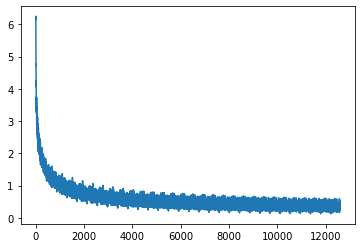

In [49]:
plt.plot(range(len(Losses)),Losses)

In [50]:
####### Can we save the weights ? Can we re-use this model once its trained?
model.layers

[{'w': array([[-0.20398586,  0.45625303,  0.04474647, ...,  0.69375648,
           0.712169  ,  0.32093199],
         [-0.25272415,  0.60770962,  0.07134558, ..., -1.50291869,
           0.1576815 , -0.72117185],
         [-0.28644318,  0.46309093,  0.47647097, ...,  0.48966066,
          -0.0480824 , -0.07149954],
         ...,
         [-1.54201159,  1.01829212, -0.74769193, ...,  0.72795679,
           1.39476828,  0.21815866],
         [-0.1909329 , -0.21697963,  2.17759396, ..., -0.18965224,
           0.46432642,  1.83059582],
         [-1.15278822, -0.52595334,  0.87948956, ..., -0.74010418,
           1.10212182,  0.02770816]]),
  'b': array([-0.74511942, -0.04607078,  1.09944469, -1.61018176,  0.84663148,
          1.47934872, -0.79499108, -2.00058064,  1.94411777, -0.3927944 ,
          1.14924348, -1.46204795, -0.57222337, -0.04404478, -0.4916743 ,
          0.5602866 ,  0.23654947,  0.34568223,  0.06481635, -0.83898043,
          0.7745975 , -0.42015937,  0.45430795,  1.828

In [51]:
import pickle
with open('data/weights.pkl', 'wb') as file:
    pickle.dump(model.layers,file)

In [52]:
with open('data/weights.pkl', 'rb') as file:
    wts=pickle.load(file)

In [53]:
wts

[{'w': array([[-0.20398586,  0.45625303,  0.04474647, ...,  0.69375648,
           0.712169  ,  0.32093199],
         [-0.25272415,  0.60770962,  0.07134558, ..., -1.50291869,
           0.1576815 , -0.72117185],
         [-0.28644318,  0.46309093,  0.47647097, ...,  0.48966066,
          -0.0480824 , -0.07149954],
         ...,
         [-1.54201159,  1.01829212, -0.74769193, ...,  0.72795679,
           1.39476828,  0.21815866],
         [-0.1909329 , -0.21697963,  2.17759396, ..., -0.18965224,
           0.46432642,  1.83059582],
         [-1.15278822, -0.52595334,  0.87948956, ..., -0.74010418,
           1.10212182,  0.02770816]]),
  'b': array([-0.74511942, -0.04607078,  1.09944469, -1.61018176,  0.84663148,
          1.47934872, -0.79499108, -2.00058064,  1.94411777, -0.3927944 ,
          1.14924348, -1.46204795, -0.57222337, -0.04404478, -0.4916743 ,
          0.5602866 ,  0.23654947,  0.34568223,  0.06481635, -0.83898043,
          0.7745975 , -0.42015937,  0.45430795,  1.828

In [54]:
##### Create a new model #######
mod_infer=MLP(784)
mod_infer.add_layer(30,"sigmoid")
mod_infer.add_layer(10,"softmax")

In [55]:
mod_infer.layers=wts

In [56]:
mod_infer.layers

[{'w': array([[-0.20398586,  0.45625303,  0.04474647, ...,  0.69375648,
           0.712169  ,  0.32093199],
         [-0.25272415,  0.60770962,  0.07134558, ..., -1.50291869,
           0.1576815 , -0.72117185],
         [-0.28644318,  0.46309093,  0.47647097, ...,  0.48966066,
          -0.0480824 , -0.07149954],
         ...,
         [-1.54201159,  1.01829212, -0.74769193, ...,  0.72795679,
           1.39476828,  0.21815866],
         [-0.1909329 , -0.21697963,  2.17759396, ..., -0.18965224,
           0.46432642,  1.83059582],
         [-1.15278822, -0.52595334,  0.87948956, ..., -0.74010418,
           1.10212182,  0.02770816]]),
  'b': array([-0.74511942, -0.04607078,  1.09944469, -1.61018176,  0.84663148,
          1.47934872, -0.79499108, -2.00058064,  1.94411777, -0.3927944 ,
          1.14924348, -1.46204795, -0.57222337, -0.04404478, -0.4916743 ,
          0.5602866 ,  0.23654947,  0.34568223,  0.06481635, -0.83898043,
          0.7745975 , -0.42015937,  0.45430795,  1.828

In [57]:
X_test=mnist_test.values

In [58]:
preds_test=mod_infer.forward(X_test/255.0)

In [59]:
labels_test=preds_test.argmax(axis=1)

In [60]:
labels_test

array([2, 0, 9, ..., 3, 9, 2])

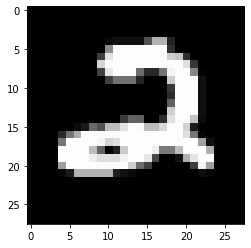

In [61]:
plt.imshow(mnist_test.iloc[0].values.reshape((28,28)),cmap="gray")

In [66]:
X_test.shape

(28000, 784)